In [ ]:
"""
   - ------   BINANCE WEBSOCKET ERROR  -------
      -----------  TEST LIVE DATA and DATA BASE --------
              ( - ICI CA MARCHE - )
YT :::
Algovibes
39,3 k abonnés

FIX ERROR BINANCE WEBSOCKET ...

How to get LIVE cryptocurrency data with Python using the 
Binance API / 
ERROR FIXING
https://www.youtube.com/watch?v=OX5eDJDtqhc
https://www.youtube.com/watch?v=OX5eDJDtqhc

YT  :::
INFINITY ALEX  ( - ICI CA MARCHE - )
https://www.youtube.com/watch?v=ml3jGc8RqMk
https://www.youtube.com/watch?v=ml3jGc8RqMk

"""

In [ ]:
pip install python-binance

In [ ]:
pip install pandas-ta

In [3]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import sqlalchemy
from binance import Client

In [2]:
import pandas as pd
#import python_ta as ta
import numpy as np

In [3]:
# LE SCREENER  2 ........................................................
api_key ='GwvK4xNzrBr1HpEozMWx2AnWevMRlUZxPgroPvDcy2l4tqdzBH1eBa6PSpriyQTb'
api_secret = 'DGij2y3b9teZHM0vrqafkGzuKbtKCM4wtI3RpA96DqPFNo433HCUJhs4cnSI3MQq'
client = Client(api_key,api_secret)
#client = Client()
client.get_account()  # <<< Pour avoir le solde du compte BINANACE   ...

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00100000',
  'taker': '0.00100000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1664435064723,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.10047657', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {

In [4]:
symbol ='BTCUSDT'

In [5]:
engine = sqlalchemy.create_engine('sqlite:///'+ symbol + 'stream.db')

<AxesSubplot:>

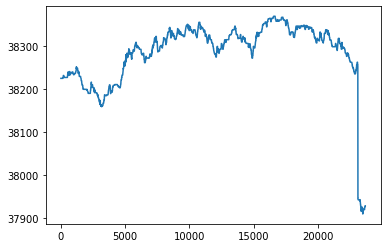

In [6]:
df=pd.read_sql('BTCUSDT', engine)
df.Price.plot()
#Fdf.plot()

In [9]:
pip install ta


Note: you may need to restart the kernel to use updated packages.


In [5]:
"""
Rajout du mardi 28 fev 2023.
YT : 
Scriptopia
315 abonnés

MACD and RSI Generator - Python script using Binance API [Source code].
MACD and RSI Generator - Python script using Binance API [Source code].

https://www.youtube.com/watch?v=7L5kLTVg_g4&t=282s
https://www.youtube.com/watch?v=7L5kLTVg_g4&t=282s
https://scriptopia.co.uk/2021/11/15/technical-trading-bot-strategy-1-macd-rsi/
https://scriptopia.co.uk/2021/11/15/technical-trading-bot-strategy-1-macd-rsi/
"""
import pandas as pd
# import btalib
# import ta
import pandas_ta as ta
from datetime import datetime
from binance.client import Client

# api_key = 'BINANCE API KEY'
# api_secret = 'BINANCE SECRET KEY'
client = Client(api_key,api_secret)

def Main(Instrument):
    #Here we define our data from date, in this case I want hourly data starting from yesterday
    Data = client.get_historical_klines(Instrument, '1h', '12 Mars, 2022')
    #Define the data for frame
    bnb_df = pd.DataFrame(Data, columns=['timestamp', 'Open', 'High', 'Low', 'Close','Volume', 'Ctime', 'Quotes', 'Trades', 'Taker base','Taker quote', 'Ignore'])
    #Set the index
    bnb_df.set_index('timestamp', inplace=True)
    #Convert the timestamp which is in MS to an appropriate timestamp
    bnb_df.index = pd.to_datetime(bnb_df.index, unit='ms')
    #Prepping the OHLCV data for validation
    ohlcv_columns = ['Open', 'High', 'Low', 'Close','Volume']
    #Validating the data types for the OHLCV data columns
    bnb_df[ohlcv_columns] = bnb_df[ohlcv_columns].astype('float')

    
    #Generating the MACD using btalib
    # MACD = ta.trend.MACD(bnb_df, pfast=12, pslow=26, psignal=9)
    # MACD = ta.trend.MACD(bnb_df, 12, 26, 9)  # Calculate the MACD via ta
        
       
    #Generating the RSI using btalib
    # RSI = btalib.rsi(bnb_df, period=12)    
    # RSI = ta.momentum.RSIIndicator(bnb_df, 12)  # with the ta lib ...
    # RSI = ta.momentum.rsi(bnb_df, window=14)    # with the ta lib ...
    bnb_df["EMA200"] = ta.ema(bnb_df.Close, length=200)  # with the pandas_ta lib ...
    bnb_df["RSI"] = ta.rsi(bnb_df.Close, length=10)       # with the pandas_ta lib ...
    
    #--- CALCULATE  MACD ---
    #https://www.alpharithms.com/calculate-macd-python-272222/
    #https://www.alpharithms.com/calculate-macd-python-272222/
    # Get the 12-day EMA of the closing price--- MACD---
    k = bnb_df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
    # Get the 26-day EMA of the closing price
    d = bnb_df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()    
    # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
    macd = k - d
    # Get the 9-Day EMA of the MACD for the Trigger line
    macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
    # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
    macd_h = macd - macd_s
    # Add all of our new values for the MACD to the dataframe
    bnb_df['macd'] = bnb_df.index.map(macd)
    bnb_df['macd_s'] = bnb_df.index.map(macd_s)
    bnb_df['macd_h'] = bnb_df.index.map(macd_h)   # <<<--- MACD Histogramme ...
    #--------------------- FIN  CALCULATE  MACD FIN ---------------------------------     
    
    """
    #Merging the MACD and RSI to our data frame
    bnb_df = bnb_df.join([MACD.df,RSI.df])
    #Writing the data frame to a CSV file
    bnb_df.to_csv(Instrument+'.csv') 

    """

    # bnb_df["STC"] = ta.stc(bnb_df.Close)       # with the pandas_ta lib ... 
    # bnb_df["STC"] = ta.stc(bnb_df.High, bnb_df.Low, bnb_df.Close, fastk_period=10, slowk_period=20)
    # bnb_df["STC"] = ta.stc(bnb_df.High, bnb_df.Low, bnb_df.Close, tclength=10)       # with the pandas_ta lib ...  
    
   
     
   
    print(bnb_df)

    return bnb_df
    

df = Main(symbol) #For this example we are using BNB TO GBP although any pair would be available to you

                         Open      High       Low     Close       Volume  \
timestamp                                                                  
2022-03-12 00:00:00  38729.57  39161.21  38660.52  39144.28   1225.37891   
2022-03-12 01:00:00  39144.28  39327.99  39067.97  39185.00   1240.22315   
2022-03-12 02:00:00  39184.99  39268.37  39044.28  39124.47    827.24979   
2022-03-12 03:00:00  39124.47  39237.48  39080.24  39088.94    905.22722   
2022-03-12 04:00:00  39088.93  39196.51  38931.80  39108.00    976.48662   
...                       ...       ...       ...       ...          ...   
2023-03-03 04:00:00  22319.69  22393.33  22251.08  22376.50  10661.47999   
2023-03-03 05:00:00  22376.46  22411.36  22329.14  22341.80   9261.94983   
2023-03-03 06:00:00  22341.80  22402.25  22325.81  22378.73   9627.66386   
2023-03-03 07:00:00  22379.01  22404.70  22332.03  22360.78   9973.58999   
2023-03-03 08:00:00  22360.78  22383.22  22354.36  22372.99   1576.98365   

           

In [122]:
help(ta.stc)
# help(ta.rsi)

Help on function stc in module pandas_ta.momentum.stc:

stc(close, tclength=None, fast=None, slow=None, factor=None, offset=None, **kwargs)
    Schaff Trend Cycle (STC)
    
    The Schaff Trend Cycle is an evolution of the popular MACD incorportating two
    cascaded stochastic calculations with additional smoothing.
    
    The STC returns also the beginning MACD result as well as the result after the
    first stochastic including its smoothing. This implementation has been extended
    for Pandas TA to also allow for separatly feeding any other two moving Averages
    (as ma1 and ma2) or to skip this to feed an oscillator (osc), based on which the
    Schaff Trend Cycle should be calculated.
    
    Feed external moving averages:
    Internally calculation..
        stc = ta.stc(close=df["close"], tclen=stc_tclen, fast=ma1_interval, slow=ma2_interval, factor=stc_factor)
    becomes..
        extMa1 = df.ta.zlma(close=df["close"], length=ma1_interval, append=True)
        extMa2 =

In [ ]:

"""
backtest_tools/backtest/multi_division/bollinger_trend.ipynb
backtest_tools/backtest/multi_division/bollinger_trend.ipynb
backtest_tools/backtest/multi_division/bollinger_trend.ipynb
"""

In [1]:
pip install utilities


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement utilities (from versions: none)
ERROR: No matching distribution found for utilities


In [1]:
import sys
print(sys.path)

['c:\\Users\\user\\Desktop\\BOT_YT_SMA_LIVE', 'C:\\Users\\user\\Desktop\\Demo_YT', 'c:\\Users\\user\\miniconda3\\python37.zip', 'c:\\Users\\user\\miniconda3\\DLLs', 'c:\\Users\\user\\miniconda3\\lib', 'c:\\Users\\user\\miniconda3', '', 'c:\\Users\\user\\miniconda3\\lib\\site-packages', 'c:\\Users\\user\\miniconda3\\lib\\site-packages\\win32', 'c:\\Users\\user\\miniconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\user\\miniconda3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\user\\miniconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\user\\.ipython']


In [2]:
# To add a directory containing your utilities module to the Python path, you can use the sys.path.append() function in Python. 

import sys
sys.path.append('C:\\Users\\user\\Desktop\\BOT_YT_SMA_LIVE\\backtest_tools\\utilities')

In [3]:
# To add a directory containing your utilities module to the Python path, you can use the sys.path.append() function in Python. 

import sys
sys.path.append('C:\\Users\\user\\Desktop\\BOT_YT_SMA_LIVE\\backtest_tools')

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""
YT:
CryptoRobotFr/backtest_tools
CryptoRobotFr/backtest_tools
https://github.com/CryptoRobotFr/backtest_tools
https://github.com/CryptoRobotFr/backtest_tools

FOR SETUP THE PROJECT.

Prérequis: Python, Node, Git

Mise en place du projet:

git clone https://github.com/CryptoRobotFr/backtest_tools.git
cd backtest_tools

Mise en place de l'environnement virtuel (très recommandé):

python -m venv .venv
.venv\Scripts\activate
pip install -r .\requirements.txt

Le projet est prêt à être utilisé.
"""

In [4]:
"""
YT:
CryptoRobotFr/backtest_tools
CryptoRobotFr/backtest_tools
backtest_tools/backtest/multi_division/bollinger_trend.ipynb
backtest_tools/backtest/multi_division/bollinger_trend.ipynb
backtest_tools/backtest/multi_division/bollinger_trend.ipynb

https://github.com/CryptoRobotFr/backtest_tools
https://github.com/CryptoRobotFr/backtest_tools
npm install
npm install ccxt
node .\database\download_data.js
node .\database\dl_for_quick_analysis.js
.
.
"""
import sys
sys.path.append('../..')

from utilities.get_data import get_historical_from_db
from utilities.backtesting import basic_single_asset_backtest, plot_wallet_vs_asset, get_metrics, get_n_columns, plot_sharpe_evolution, plot_bar_by_month, complete_multi_asset_backtest
from utilities.custom_indicators import get_n_columns
from utilities.data_manager import ExchangeDataManager

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import ccxt
import matplotlib.pyplot as plt
import ta
import numpy as np
from scipy.stats import norm
import copy
import math

In [5]:
class ValueAtRisk:
    def __init__(self, df_list):
        self.df_list = df_list
        self.cov = None
        self.avg_return = None
        self.conf_level = 0.05
        self.usd_balance = 1

    def update_cov(self, current_date, occurance_data=1000):
        returns = pd.DataFrame()
        returns["temp"] = [0] * (occurance_data)
        for pair in self.df_list:
            temp_df = self.df_list[pair].copy()
            try:
                iloc_date = int(temp_df.loc[current_date]["iloc"])
                if math.isnan(iloc_date) or iloc_date-occurance_data < 0:
                    returns["long_"+pair] = -1
                    returns["short_"+pair] = -1
                else:
                    returns["long_"+pair] = temp_df.iloc[iloc_date-occurance_data:iloc_date].reset_index()["close"].pct_change()
                    returns["short_"+pair] = -temp_df.iloc[iloc_date-occurance_data:iloc_date].reset_index()["close"].pct_change()
            except Exception as e:
                returns["long_"+pair] = -1
                returns["short_"+pair] = -1
        # Generate Var-Cov matrix
        del returns["temp"]
        returns = returns.iloc[:-1]
        self.cov = returns.cov()
        self.cov = self.cov.replace(0.0, 1.0)
        # Calculate mean returns for each stock
        self.avg_return = returns.mean()
        return returns

    def get_var(self, positions):
        usd_in_position = 0
        for pair in list(positions.keys()):
            usd_in_position += positions[pair]["long"] + positions[pair]["short"]
        weights = []   
        if usd_in_position == 0:
            return 0
        for pair in list(positions.keys()):
            weights.append(positions[pair]["long"] / usd_in_position)
            weights.append(positions[pair]["short"] / usd_in_position)

        weights = np.array(weights)

        port_mean = self.avg_return.dot(weights)

        # Calculate portfolio standard deviation
        port_stdev = np.sqrt(weights.T.dot(self.cov).dot(weights))

        # Calculate mean of investment
        mean_investment = (1+port_mean) * usd_in_position

        # Calculate standard deviation of investmnet
        stdev_investment = usd_in_position * port_stdev

        # Using SciPy ppf method to generate values for the
        # inverse cumulative distribution function to a normal distribution
        # Plugging in the mean, standard deviation of our portfolio
        # as calculated above
        cutoff1 = norm.ppf(self.conf_level, mean_investment, stdev_investment)

        #Finally, we can calculate the VaR at our confidence interval
        var_1d1 = usd_in_position - cutoff1
        
        return var_1d1 / self.usd_balance * 100

In [94]:
class BollingerTrend():
    def __init__(
        self,
        df_list,
        oldest_pair,
        parameters_obj,
        type=["long"],
    ):
        self.df_list = df_list
        self.oldest_pair = oldest_pair
        self.parameters_obj = parameters_obj
        self.use_long = True if "long" in type else False
        self.use_short = True if "short" in type else False
        
    def populate_indicators(self, show_log=False):
        # -- Clear dataset --
        for pair in self.df_list:
            df = self.df_list[pair]
            params = self.parameters_obj[pair]
            df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)
          
            #Add moving averages to the data frame
            df['sma-20'] = df['close'].rolling(20).mean()   # <<<--- EMA 20 -----..
            # SLOPE sma-20..  
            # SLOPE sma-20..  
            # SLOPE sma-20..  
            df['sma-50'] = df['close'].rolling(50).mean() # <<<--- EMA 50 --------..
            # function to find crossovers between sma-20 and sma-50 ....
            # function to find crossovers between sma-20 and sma-50 ....
            df['sma-150'] = df['close'].rolling(150).mean() # <<<--- EMA 150 --------..
            # function to find crossovers between sma-20 and sma-50 ....

            def detect_uptri(df):
                # Avec et from Chat GPT ......
                # Créer une colonne "Uptri" et l'initialiser à False
                df["Uptri"] = False

                # Initialiser l'état intermédiaire à False pour chaque condition
                prev_cross_20_50 = False
                prev_cross_20_150 = False
                prev_cross_50_150 = False
                price_above_20 = False
                last_price = 0

                # Parcourir chaque ligne du dataframe
                for index, row in df.iterrows():
                    # Récupérer les valeurs des colonnes "sma-20", "sma-50", "sma-150" et "Close"
                    sma_20 = row["sma-20"]
                    sma_50 = row["sma-50"]
                    sma_150 = row["sma-150"]
                    price = row["close"]

                    # Condition 1: Croisement haussier entre la moyenne mobile 20 et la moyenne mobile 50
                    if sma_20 > sma_50 and not prev_cross_20_50:
                        prev_cross_20_50 = True
                        last_price = price

                    # Condition 2: Après le premier croisement, un deuxième croisement haussier entre la moyenne mobile 20 et la moyenne mobile 150
                    elif sma_20 > sma_150 and prev_cross_20_50 and not prev_cross_20_150:
                        prev_cross_20_150 = True

                    # Condition 3: Après le deuxième croisement, un troisième croisement haussier entre la moyenne mobile 50 et la moyenne mobile 150
                    elif sma_50 > sma_150 and prev_cross_20_150 and not prev_cross_50_150:
                        prev_cross_50_150 = True

                    # Condition 4: Entre le deuxième et le troisième croisement, le prix ne peut pas descendre en dessous de la moyenne mobile 20
                    elif price < sma_20 and prev_cross_20_150 and not prev_cross_50_150:
                        prev_cross_20_50 = False
                        prev_cross_20_150 = False
                        last_price = 0

                    # Condition 5: A chaque croisement, la valeur prix doit être supérieure à sa valeur au croisement précédent
                    elif price > last_price and prev_cross_20_50 and prev_cross_20_150 and prev_cross_50_150:
                        # Vérifier que le prix est toujours au-dessus de la moyenne mobile 20 depuis le deuxième croisement
                        if price > sma_20 and not price_above_20:
                            price_above_20 = True
                        # Si toutes les conditions sont remplies, mettre à jour la colonne "Uptri" à True
                        elif price_above_20:
                            df.at[index, "Uptri"] = True
                            last_price = price
                    # SINON TOUT ANNULER  ...   !!!!
                    elif (sma_20 < sma_50 or sma_20 < sma_150 or sma_50 < sma_150) and prev_cross_20_50 and prev_cross_20_150 and prev_cross_50_150:
                        df.at[index, "Uptri"] = False
                        prev_cross_20_50 = False
                        prev_cross_20_150 = False
                        prev_cross_50_150 = False
                        price_above_20 = False
                        last_price = 0

                # Calcul du nombre de cas trouvés dans Uptri ...
                # num_uptri = sum(Uptri)
                num_uptri = df["Uptri"].sum()
                # Affichage du nombre de cas trouvés
                print(f"{num_uptri} cas UPs trouvés dans ", pair )

                # Si aucun cas trouvé, afficher un message d'avertissement
                if num_uptri == 0:
                    input("ATTENTION ZERO CAS UPs TROUVÉ. Appuyez sur ENTER pour continuer.")                        


            def detect_downtri(df):
                """
                Detects descending triangles in a financial dataframe.

                Parameters:
                    df (pandas.DataFrame): A pandas dataframe containing financial data.

                Returns:
                    None
                """

                # Create a "downtri" column and initialize it to False
                df["Downtri"] = False

                # Initialize the intermediate state to False for each condition
                prev_cross_20_50 = False
                prev_cross_20_150 = False
                prev_cross_50_150 = False
                price_below_20 = False
                last_price = 0

                # Loop through each row in the dataframe
                for index, row in df.iterrows():
                    # Get the values of the "sma-20", "sma-50", "sma-150" and "Close" columns
                    sma_20 = row["sma-20"]
                    sma_50 = row["sma-50"]
                    sma_150 = row["sma-150"]
                    price = row["close"]

                    # Condition 1: Bearish crossover between the 20-day moving average and the 50-day moving average
                    if sma_20 < sma_50 and not prev_cross_20_50:
                        prev_cross_20_50 = True
                        last_price = price

                    # Condition 2: After the first crossover, a second bearish crossover between the 20-day moving average and the 150-day moving average
                    elif sma_20 < sma_150 and prev_cross_20_50 and not prev_cross_20_150:
                        prev_cross_20_150 = True

                    # Condition 3: After the second crossover, a third bearish crossover between the 50-day moving average and the 150-day moving average
                    elif sma_50 < sma_150 and prev_cross_20_150 and not prev_cross_50_150:
                        prev_cross_50_150 = True

                    # Condition 4: Between the second and third crossover, the price cannot rise above the 20-day moving average
                    elif price > sma_20 and prev_cross_20_150 and not prev_cross_50_150:
                        prev_cross_20_50 = False
                        prev_cross_20_150 = False
                        last_price = 0

                    # Condition 5: At each crossover, the price value must be lower than its value at the previous crossover
                    elif price < last_price and prev_cross_20_50 and prev_cross_20_150 and prev_cross_50_150:
                        # Check that the price is still below the 20-day moving average since the second crossover
                        if price < sma_20 and not price_below_20:
                            price_below_20 = True
                        # If all conditions are met, update the "downtri" column to True
                        elif price_below_20:
                            df.at[index, "Downtri"] = True
                            last_price = price
                    # OTHERWISE RESET ALL STATE VARIABLES !!!!
                    elif (sma_20 > sma_50 or sma_20 > sma_150 or sma_50 > sma_150) and prev_cross_20_50 and prev_cross_20_150 and prev_cross_50_150:
                        df.at[index, "Downtri"] = False
                        prev_cross_20_50 = False
                        prev_cross_20_150 = False
                        prev_cross_50_150 = False
                        # price_below
                        price_below_20 = False
                        last_price = 0



                # Calcul du nombre de cas trouvés dans Downtri ...
                num_downtri = df["Downtri"].sum()
                # Affichage du nombre de cas trouvés
                print(f"{num_downtri} cas DOWN trouvés dans {pair}")

                # Si aucun cas trouvé, afficher un message d'avertissement
                if num_downtri == 0:
                    input("ATTENTION ZERO CAS DOWN TROUVÉ. Appuyez sur ENTER pour continuer.") 



            detect_uptri(df)
            detect_downtri(df)

            #Add "signal" column
            df['signal_1'] = np.where(df['sma-20'] > df['sma-50'], 1, 0)
            df['signal_1'] = np.where(df['sma-20'] < df['sma-50'], -1, df['signal_1'])  
            df['entry_1'] = df.signal_1.diff()

            df['entry1_val_up'] = df['entry_1'].loc[df.entry_1 == 2] #.index
            df['entry1_val_down'] = df['entry_1'].loc[df.entry_1 == -2]#.index                       
            
            df['signal_2'] = np.where(df['sma-20'] > df['sma-150'], 1, 0)
            df['signal_2'] = np.where(df['sma-20'] < df['sma-150'], -1, df['signal_2'])
            df['entry_2'] = df.signal_2.diff()

            df['entry2_val_up'] = df['entry_2'].loc[df.entry_2 == 2] #.index
            df['entry2_val_down'] = df['entry_2'].loc[df.entry_2 == -2] #.index                        

            df['signal_3'] = np.where(df['sma-50'] > df['sma-150'], 1, 0)
            df['signal_3'] = np.where(df['sma-50'] < df['sma-150'], -1, df['signal_3'])            
            df['entry_3'] = df.signal_3.diff()

            df['entry3_val_up'] = df['entry_3'].loc[df.entry_3 == 2] #.index
            df['entry3_val_down'] = df['entry_3'].loc[df.entry_3 == -2] #.index            

            # plt1.plot(df[-252:].loc[df.entry_1 == 2].index, df[-252:]['sma-20'][df.entry_1 == 2], '^', color = 'g', markersize = 12)
            # plt1.plot(df[-252:].loc[df.entry_2 == 2].index, df[-252:]['sma-50'][df.entry_2 == 2], '^', color = 'g', markersize = 12)
            # plt1.plot(df[-252:].loc[df.entry_3 == 2].index, df[-252:]['sma-150'][df.entry_3 == 2], '^', color = 'g', markersize = 12)

            # -- Populate indicators for  BOLLINGER BAND --
            bol_band = ta.volatility.BollingerBands(close=df["close"], window=params["bb_window"], window_dev=params["bb_std"])
            df["lower_band"] = bol_band.bollinger_lband()
            df["higher_band"] = bol_band.bollinger_hband()
            df["ma_band"] = bol_band.bollinger_mavg()

            df['long_ma'] = ta.trend.sma_indicator(close=df['close'], window=params["long_ma_window"])
            df['iloc'] = range(len(df))

            df = get_n_columns(df, ["ma_band", "lower_band", "higher_band", "close"], 1)
            
            self.df_list[pair] = df
            # -- Log --
            if(show_log):
                print(self.df_list[self.oldest_pair])
                
        return self.df_list[self.oldest_pair]
    
    def populate_buy_sell(self, show_log=False): 
        data_open_long = []
        data_close_long = []
        data_open_short = []
        data_close_short = []

        for pair in self.df_list:
            df = self.df_list[pair]
            # -- Initiate populate --
            df["open_long_market"] = False
            df["close_long_market"] = False
            df["open_short_market"] = False
            df["close_short_market"] = False
            df["pair"] = pair
            df["null"] = np.nan
            
            if self.use_long:
                # -- Populate open long market --

                df.loc[ (df['Uptri'] == True)
#                df.loc[ (df['entry3_val_up'] >= df['entry2_val_up'])                       
                    #& (df['entry2_val_up'] > df['entry1_val_up'])   

                    #& (df['n1_close'] < df['n1_higher_band']) 
                    #& (df['close'] > df['higher_band']) 
                    #& (df["close"] > df["long_ma"]) 
                    , "open_long_market"
                ] = True
            
                # -- Populate close long market --
                df.loc[
                    (df['close'] < df['ma_band']) 
                    , "close_long_market"
                ] = True

            if self.use_short:
                # -- Populate open short market --
                
                df.loc[ (df['Downtri'] == True)                
#                df.loc[ (df['entry3_val_down'] <= df['entry2_val_down'])
                    #& (df['entry2_val_down'] < df['entry1_val_down']) 

                    #& (df['n1_close'] > df['n1_lower_band']) 
                    #& (df['close'] < df['lower_band']) 
                    #& (df["close"] < df["long_ma"])
                    , "open_short_market"
                ] = True
            
                # -- Populate close short market --
                df.loc[
                    (df['close'] > df['ma_band']) 
                    , "close_short_market"
                ] = True
                
            # -- Populate pair list per date (do not touch)--
            data_open_long.append(
                df.loc[
                (df['open_long_market']  == True) 
                ]['pair']
            )
            data_close_long.append(
                df.loc[
                (df['close_long_market']  == True) 
                ]['pair']
            )
            data_open_short.append(
                df.loc[
                (df['open_short_market']  == True) 
                ]['pair']
            )
            data_close_short.append(
                df.loc[
                (df['close_short_market']  == True) 
                ]['pair']
            )

        data_open_long.append(self.df_list[self.oldest_pair]['null'])
        data_close_long.append(self.df_list[self.oldest_pair]['null'])
        data_open_short.append(self.df_list[self.oldest_pair]['null'])
        data_close_short.append(self.df_list[self.oldest_pair]['null'])
        df_open_long = pd.concat(data_open_long, axis=1)
        df_open_long['combined']= df_open_long.values.tolist()
        df_open_long['combined'] = [[i for i in j if i == i] for j in list(df_open_long['combined'])]
        df_close_long = pd.concat(data_close_long, axis=1)
        df_close_long['combined']= df_close_long.values.tolist()
        df_close_long['combined'] = [[i for i in j if i == i] for j in list(df_close_long['combined'])]
        df_open_short = pd.concat(data_open_short, axis=1)
        df_open_short['combined']= df_open_short.values.tolist()
        df_open_short['combined'] = [[i for i in j if i == i] for j in list(df_open_short['combined'])]
        df_close_short = pd.concat(data_close_short, axis=1)
        df_close_short['combined']= df_close_short.values.tolist()
        df_close_short['combined'] = [[i for i in j if i == i] for j in list(df_close_short['combined'])]
        self.open_long_obj = df_open_long['combined']
        self.close_long_obj = df_close_long['combined']
        self.open_short_obj = df_open_short['combined']
        self.close_short_obj = df_close_short['combined']
        
        # -- Log --
        if(show_log):
            print("Open LONG length on oldest pair :",len(self.df_list[self.oldest_pair].loc[self.df_list[self.oldest_pair]["open_long_market"]==True]))
            print("Close LONG length on oldest pair :",len(self.df_list[self.oldest_pair].loc[self.df_list[self.oldest_pair]["close_long_market"]==True]))
            print("Open SHORT length on oldest pair :",len(self.df_list[self.oldest_pair].loc[self.df_list[self.oldest_pair]["open_short_market"]==True]))
            print("Close SHORT length on oldest pair :",len(self.df_list[self.oldest_pair].loc[self.df_list[self.oldest_pair]["close_short_market"]==True]))
        
        return self.df_list[self.oldest_pair]
    
    def run_backtest(self, initial_wallet=1000, leverage=1, max_var=1):
        df_ini = self.df_list[self.oldest_pair][:]
        wallet = initial_wallet
        usd_remaining = initial_wallet
        long_exposition = 0
        short_exposition = 0
        maker_fee = 0.0007
        taker_fee = 0.0007
        trades = []
        days = []
        current_day = 0
        previous_day = 0
        current_positions = {}
        positions_exposition = {}
        for pair in self.df_list:
            positions_exposition[pair] = {"long":0, "short":0}
        var = ValueAtRisk(df_list=self.df_list.copy())
        var_counter = 0
        
        for index, row in df_ini.iterrows():
            if max_var != 0:
                if var_counter == 0:
                    var.update_cov(current_date=index, occurance_data=1000)
                    var_counter = 1000
                else:
                    var_counter -= 1
            # -- Add daily report --
            current_day = index.day
            if previous_day != current_day:
                temp_wallet = wallet
                for pos in current_positions:
                    actual_row = self.df_list[pos].loc[index]
                    if current_positions[pos]['side'] == "LONG":
                        close_price = actual_row['close']
                        trade_result = (close_price - current_positions[pos]['price']) / current_positions[pos]['price']
                        close_size = current_positions[pos]['size'] + current_positions[pos]['size']  * trade_result
                        fee = close_size * taker_fee
                        temp_wallet += close_size - current_positions[pos]['size'] - fee
                    elif current_positions[pos]['side'] == "SHORT":
                        close_price = actual_row['close']
                        trade_result = (current_positions[pos]['price'] - close_price) / current_positions[pos]['price']
                        close_size = current_positions[pos]['size'] + current_positions[pos]['size']  * trade_result
                        fee = close_size * taker_fee
                        temp_wallet += close_size - current_positions[pos]['size'] - fee
                if max_var != 0:
                    risk = var.get_var(positions=positions_exposition)
                else:
                    risk = 0
                # if risk == 0 and long_exposition + short_exposition > 0.1:
                #     print(positions_exposition)
                # elif math.isnan(risk):
                #     print(positions_exposition)
                days.append({
                    "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
                    "wallet":temp_wallet,
                    "price":row['close'],
                    "long_exposition":long_exposition,
                    "short_exposition":short_exposition,
                    "risk": risk
                })
            previous_day = current_day 
            
            # Sell
            close_long_row = self.close_long_obj.loc[index]
            close_short_row = self.close_short_obj.loc[index]
            if len(current_positions) > 0:
                position_to_close = set({k: v for k,v in current_positions.items() if v['side'] == "LONG"}).intersection(set(close_long_row))
                for pos in position_to_close:
                    actual_row = self.df_list[pos].loc[index]
                    close_price = actual_row['close']
                    trade_result = (close_price - current_positions[pos]['price']) / current_positions[pos]['price']
                    close_size = current_positions[pos]['size'] + current_positions[pos]['size']  * trade_result
                    fee = close_size * taker_fee
                    wallet += close_size - current_positions[pos]['size'] - fee
                    long_exposition -= self.parameters_obj[pos]['wallet_exposure']
                    positions_exposition[pos]["long"] -= self.parameters_obj[pos]['wallet_exposure']
                    trades.append({
                        "pair": pos,
                        "open_date": current_positions[pos]['date'],
                        "close_date": index,
                        "position": current_positions[pos]['side'],
                        "open_reason": current_positions[pos]['reason'],
                        "close_reason": "Limit",
                        "open_price": current_positions[pos]['price'],
                        "close_price": close_price,
                        "open_fee": current_positions[pos]['fee'],
                        "close_fee": fee,
                        "open_trade_size":current_positions[pos]['size'],
                        "close_trade_size":close_size,
                        "wallet": wallet,
                    })
                    del current_positions[pos]   
                short_position_to_close = set({k: v for k,v in current_positions.items() if v['side'] == "SHORT"}).intersection(set(close_short_row))
                for pos in short_position_to_close:
                    actual_row = self.df_list[pos].loc[index]
                    close_price = actual_row['close']
                    trade_result = (current_positions[pos]['price'] - close_price) / current_positions[pos]['price']
                    close_size = current_positions[pos]['size'] + current_positions[pos]['size'] * trade_result
                    fee = close_size * taker_fee
                    wallet += close_size - current_positions[pos]['size'] - fee
                    short_exposition -= self.parameters_obj[pos]['wallet_exposure']
                    positions_exposition[pos]["short"] -= self.parameters_obj[pos]['wallet_exposure']
                    trades.append({
                        "pair": pos,
                        "open_date": current_positions[pos]['date'],
                        "close_date": index,
                        "position": current_positions[pos]['side'],
                        "open_reason": current_positions[pos]['reason'],
                        "close_reason": "Limit",
                        "open_price": current_positions[pos]['price'],
                        "close_price": close_price,
                        "open_fee": current_positions[pos]['fee'],
                        "close_fee": fee,
                        "open_trade_size":current_positions[pos]['size'],
                        "close_trade_size":close_size,
                        "wallet": wallet,
                    })
                    del current_positions[pos] 
                    
            # Buy
            open_long_row = self.open_long_obj.loc[index]
            if len(open_long_row) > 0:
                for pos in open_long_row:
                    # if (pos not in current_positions) and (long_exposition + self.parameters_obj[pos]['wallet_exposure'] <= 1) and (long_exposition + self.parameters_obj[pos]['wallet_exposure'] - short_exposition <= max_side_exposition):
                    if (pos not in current_positions) and (long_exposition + self.parameters_obj[pos]['wallet_exposure'] <= 1):
                        if max_var != 0:
                            new_positions = copy.deepcopy(positions_exposition)
                            new_positions[pos]["long"] += self.parameters_obj[pos]['wallet_exposure']
                            new_risk = var.get_var(positions=new_positions)
                            if new_risk > max_var:
                                continue
                        actual_row = self.df_list[pos].loc[index]
                        open_price = actual_row['close']
                        pos_size = wallet * self.parameters_obj[pos]['wallet_exposure'] * leverage
                        long_exposition += self.parameters_obj[pos]['wallet_exposure']
                        positions_exposition[pos]["long"] += self.parameters_obj[pos]['wallet_exposure']
                        # print(positions_exposition)
                        fee = pos_size * taker_fee
                        pos_size -= fee
                        wallet -= fee
                        current_positions[pos] = {
                            "size": pos_size,
                            "date": index,
                            "price": open_price,
                            "fee":fee,
                            "reason": "Limit",
                            "side": "LONG"
                        }
            open_short_row = self.open_short_obj.loc[index]
            if len(open_short_row) > 0:
                for pos in open_short_row:
                    if (pos not in current_positions) and (short_exposition + self.parameters_obj[pos]['wallet_exposure'] <= 1):
                        if max_var != 0:
                            new_positions = copy.deepcopy(positions_exposition)
                            new_positions[pos]["short"] += self.parameters_obj[pos]['wallet_exposure']
                            new_risk = var.get_var(positions=new_positions)
                            if new_risk > max_var:
                                continue
                        actual_row = self.df_list[pos].loc[index]
                        open_price = actual_row['close']
                        pos_size = wallet * self.parameters_obj[pos]['wallet_exposure'] * leverage
                        short_exposition += self.parameters_obj[pos]['wallet_exposure']
                        positions_exposition[pos]["short"] += self.parameters_obj[pos]['wallet_exposure']
                        fee = pos_size * taker_fee
                        pos_size -= fee
                        wallet -= fee
                        current_positions[pos] = {
                            "size": pos_size,
                            "date": index,
                            "price": open_price,
                            "fee":fee,
                            "reason": "Limit",
                            "side": "SHORT"
                        }
        df_days = pd.DataFrame(days)
        df_days['day'] = pd.to_datetime(df_days['day'])
        df_days = df_days.set_index(df_days['day'])

        if len(trades) == 0:
            print("No trades")
            return None
        df_trades = pd.DataFrame(trades)
        df_trades['open_date'] = pd.to_datetime(df_trades['open_date'])
        df_trades = df_trades.set_index(df_trades['open_date'])   
        
        # return get_metrics(df_trades, df_days) | {
        #    "wallet": wallet,
        #    "trades": df_trades,
        #    "days": df_days
        return  {
            "wallet": wallet,
            "trades": df_trades,
            "days": df_days }

        
          

In [106]:
params_coin = {
    "BTC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "ETH/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "BNB/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "LTC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "ADA/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "MATIC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "DOGE/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "BCH/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "DOT/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "AVAX/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
}

pair_list = list(params_coin.keys())
exchange_name = "binance"
tf = '1h'
oldest_pair = "BTC/USDT"

exchange = ExchangeDataManager(
    exchange_name=exchange_name, 
#    path_download="../database/exchanges"
# C:\Users\user\Desktop\BOT_YT_SMA_LIVE\backtest_tools\database\Binance\1h
    path_download="../BOT_YT_SMA_LIVE/backtest_tools/database/" 
          
)

df_list = {}
for pair in pair_list:
    df = exchange.load_data(pair, tf)
    df_list[pair] = df.loc[:]

print("Data load 100%")
df_list[oldest_pair]



Data load 100%


open      high       low     close       volume
date                                                                    
2021-01-01 00:00:00  28923.63  29031.34  28690.17  28995.13  2311.811445
2021-01-01 01:00:00  28995.13  29470.00  28960.35  29409.99  5403.068471
2021-01-01 02:00:00  29410.00  29465.26  29120.03  29194.65  2384.231560
2021-01-01 03:00:00  29195.25  29367.00  29150.02  29278.40  1461.345077
2021-01-01 04:00:00  29278.41  29395.00  29029.40  29220.31  2038.046803
...                       ...       ...       ...       ...          ...
2023-03-25 13:00:00  27451.72  27619.00  27357.14  27566.96  3063.630190
2023-03-25 14:00:00  27566.97  27648.00  27519.39  27527.06  2294.127170
2023-03-25 15:00:00  27527.06  27787.33  27485.00  27647.43  3967.312260
2023-03-25 16:00:00  27647.44  27730.00  27624.14  27629.22  2143.181050
2023-03-25 17:00:00  27629.23  27647.36  27380.00  27481.58  2981.628370

[19516 rows x 5 columns]

In [100]:
params_coin = {
    "BTC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "ETH/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "BNB/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
}

pair_list = list(params_coin.keys())
exchange_name = "binance"
tf = '1h'
oldest_pair = "BTC/USDT"

exchange = ExchangeDataManager(
    exchange_name=exchange_name, 
#    path_download="../database/exchanges"
# C:\Users\user\Desktop\BOT_YT_SMA_LIVE\backtest_tools\database\Binance\1h
    path_download="../BOT_YT_SMA_LIVE/backtest_tools/database/" 
          
)

df_list = {}
for pair in pair_list:
    df = exchange.load_data(pair, tf)
    df_list[pair] = df.loc[:]

print("Data load 100%")
df_list[oldest_pair]

Data load 100%


open      high       low     close       volume
date                                                                    
2021-01-01 00:00:00  28923.63  29031.34  28690.17  28995.13  2311.811445
2021-01-01 01:00:00  28995.13  29470.00  28960.35  29409.99  5403.068471
2021-01-01 02:00:00  29410.00  29465.26  29120.03  29194.65  2384.231560
2021-01-01 03:00:00  29195.25  29367.00  29150.02  29278.40  1461.345077
2021-01-01 04:00:00  29278.41  29395.00  29029.40  29220.31  2038.046803
...                       ...       ...       ...       ...          ...
2023-03-25 13:00:00  27451.72  27619.00  27357.14  27566.96  3063.630190
2023-03-25 14:00:00  27566.97  27648.00  27519.39  27527.06  2294.127170
2023-03-25 15:00:00  27527.06  27787.33  27485.00  27647.43  3967.312260
2023-03-25 16:00:00  27647.44  27730.00  27624.14  27629.22  2143.181050
2023-03-25 17:00:00  27629.23  27647.36  27380.00  27481.58  2981.628370

[19516 rows x 5 columns]

In [107]:
strat = BollingerTrend(
    df_list=df_list,
    oldest_pair=oldest_pair,
    parameters_obj=params_coin,
    type=["long","short"]
       
)

strat.populate_indicators()
strat.populate_buy_sell()
#. print(strat.populate_buy_sell())
bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, max_var=0.7)

df_trades, df_days = complete_multi_asset_backtest(
    trades=bt_result['trades'], 
    days=bt_result['days'],
    general_info=True,
    trades_info=True,
    days_info=True,
    long_short_info=True,
    entry_exit_info=True,
    exposition_info=True,
    pair_info=True,
    indepedant_trade=True
)

734 cas UPs trouvés dans  BTC/USDT
728 cas DOWN trouvés dans BTC/USDT
880 cas UPs trouvés dans  ETH/USDT
638 cas DOWN trouvés dans ETH/USDT
862 cas UPs trouvés dans  BNB/USDT
639 cas DOWN trouvés dans BNB/USDT
731 cas UPs trouvés dans  LTC/USDT
623 cas DOWN trouvés dans LTC/USDT
661 cas UPs trouvés dans  ADA/USDT
788 cas DOWN trouvés dans ADA/USDT
754 cas UPs trouvés dans  MATIC/USDT
775 cas DOWN trouvés dans MATIC/USDT
607 cas UPs trouvés dans  DOGE/USDT
776 cas DOWN trouvés dans DOGE/USDT
676 cas UPs trouvés dans  BCH/USDT
731 cas DOWN trouvés dans BCH/USDT
674 cas UPs trouvés dans  DOT/USDT
724 cas DOWN trouvés dans DOT/USDT
804 cas UPs trouvés dans  AVAX/USDT
809 cas DOWN trouvés dans AVAX/USDT
Period: [2021-02-11 00:00:00] -> [2023-03-25 00:00:00]
Initial wallet: 1000.0 $

--- General Information ---
Final wallet: 2182.84 $
Performance: 118.28 %
Sharpe Ratio: 1.22 | Sortino Ratio: 2.29 | Calmar Ratio: 1.45
Worst Drawdown T|D: -28.53% | -29.68%
Mean daily Drawdown: -13.36%
Buy and 

In [ ]:
bt_result

In [ ]:
df_trades

In [ ]:
df_days

In [180]:
strat.populate_buy_sell()

open      high       low     close       volume  \
date                                                                       
2022-01-01 00:00:00  46216.93  46731.39  46208.37  46656.13   1503.33095   
2022-01-01 01:00:00  46656.14  46949.99  46574.06  46778.14    943.81539   
2022-01-01 02:00:00  46778.14  46928.94  46721.96  46811.77    485.16860   
2022-01-01 03:00:00  46811.77  46916.63  46760.12  46813.20    562.88971   
2022-01-01 04:00:00  46813.21  46887.33  46591.23  46711.05    861.88389   
...                       ...       ...       ...       ...          ...   
2023-03-20 02:00:00  27675.84  27747.16  27213.06  27434.91  21233.70908   
2023-03-20 03:00:00  27436.06  27496.74  27124.47  27269.17  23114.01883   
2023-03-20 04:00:00  27269.18  27464.97  27141.36  27437.00  15822.68931   
2023-03-20 05:00:00  27436.29  27540.89  27340.88  27519.97  10628.49834   
2023-03-20 06:00:00  27520.90  27733.00  27465.42  27628.50  17179.64200   

                        sma-20  prev_sma_20      sma-50 crossUp20-50  \
date                                                                   
2022-01-01 00:00:00        NaN          NaN         NaN         None   
2022-01-01 01:00:00        NaN          NaN         NaN         None   
2022-01-01 02:00:00        NaN          NaN         NaN         None   
2022-01-01 03:00:00        NaN          NaN         NaN         None   
2022-01-01 04:00:00        NaN          NaN         NaN         None   
...                        ...          ...         ...          ...   
2023-03-20 02:00:00  27589.094   27564.0965  27398.7868         None   
2023-03-20 03:00:00  27603.812   27589.0940  27397.5746         None   
2023-03-20 04:00:00  27626.533   27603.8120  27400.4950         None   
2023-03-20 05:00:00  27650.368   27626.5330  27404.7436         None   
2023-03-20 06:00:00  27679.153   27650.3680  27410.6888         None   

                    crossDown20-50  ...  n1_ma_band n1_lower_band  \
date                                ...                             
2022-01-01 00:00:00           None  ...         NaN           NaN   
2022-01-01 01:00:00           None  ...         NaN           NaN   
2022-01-01 02:00:00           None  ...         NaN           NaN   
2022-01-01 03:00:00           None  ...         NaN           NaN   
2022-01-01 04:00:00           None  ...         NaN           NaN   
...                            ...  ...         ...           ...   
2023-03-20 02:00:00           None  ...  26431.9665  23705.770310   
2023-03-20 03:00:00           None  ...  26462.7044  23768.045706   
2023-03-20 04:00:00           None  ...  26492.5395  23837.418657   
2023-03-20 05:00:00           None  ...  26524.8831  23912.591139   
2023-03-20 06:00:00           None  ...  26556.8578  23983.248247   

                    n1_higher_band  n1_close open_long_market  \
date                                                            
2022-01-01 00:00:00            NaN       NaN            False   
2022-01-01 01:00:00            NaN  46656.13            False   
2022-01-01 02:00:00            NaN  46778.14            False   
2022-01-01 03:00:00            NaN  46811.77            False   
2022-01-01 04:00:00            NaN  46813.20            False   
...                            ...       ...              ...   
2023-03-20 02:00:00   29158.162690  27675.84            False   
2023-03-20 03:00:00   29157.363094  27434.91            False   
2023-03-20 04:00:00   29147.660343  27269.17            False   
2023-03-20 05:00:00   29137.175061  27437.00            False   
2023-03-20 06:00:00   29130.467353  27519.97            False   

                    close_long_market  open_short_market  close_short_market  \
date                                                                           
2022-01-01 00:00:00             False              False               False   
2022-01-01 01:00:00             False              False               False   
2022-01-01 02:00:00             Fal

In [44]:
#. strat.populate_buy_sell()[(strat.populate_buy_sell()['entry_1'] == 2) & (strat.populate_buy_sell()['entry_2'] == 2)].iloc[1:]
strat.populate_buy_sell()[(strat.populate_buy_sell()['entry_1'] == 2) & (strat.populate_buy_sell()['entry_2'] == 2)]

open     high       low     close       volume  \
date                                                                      
2022-09-02 12:00:00  20090.81  20355.0  20020.06  20282.82  23070.24502   

                         sma-20      sma-50       sma-150  signal_1  entry_1  \
date                                                                           
2022-09-02 12:00:00  20062.8755  20054.7426  20060.327867         1      2.0   

                     ...  n1_ma_band  n1_lower_band  n1_higher_band  n1_close  \
date                 ...                                                        
2022-09-02 12:00:00  ...  20097.9703   19649.586826    20546.353774  20090.81   

                     open_long_market  close_long_market  open_short_market  \
date                                                                          
2022-09-02 12:00:00             False              False              False   

                     close_short_market      pair  null  
date                                                     
2022-09-02 12:00:00                True  BTC/USDT   NaN  

[1 rows x 29 columns]

In [37]:
strat.populate_buy_sell()[strat.populate_buy_sell()['entry_3'] == 2]
 

open      high       low     close       volume  \
date                                                                       
2022-01-12 11:00:00  42765.18  43443.60  42683.21  42935.92   2646.33241   
2022-01-26 18:00:00  38040.90  38300.00  37565.00  37961.15   3544.88678   
2022-02-05 03:00:00  41363.96  41471.00  41341.37  41447.85    860.91629   
2022-02-16 01:00:00  44195.77  44199.99  43945.32  43988.69   1298.84747   
2022-02-26 07:00:00  39132.03  39200.00  38910.11  39200.00   1174.39016   
2022-03-09 20:00:00  42204.65  42320.00  41700.00  41841.64   1874.92116   
2022-03-16 06:00:00  39321.24  39599.26  39257.89  39588.15   1520.11513   
2022-04-17 14:00:00  40306.53  40421.15  40200.00  40359.19    804.50541   
2022-04-20 02:00:00  41351.39  41399.00  41311.69  41372.13    875.53208   
2022-05-05 02:00:00  39629.71  39798.09  39554.46  39773.33   1487.13236   
2022-05-16 14:00:00  29519.14  29842.88  29450.53  29489.45   3161.48561   
2022-05-23 09:00:00  30345.73  30520.00  30299.99  30441.94   1658.92556   
2022-05-26 19:00:00  29605.21  29619.79  29373.35  29379.76   2483.00926   
2022-05-30 09:00:00  30731.78  30765.09  30593.72  30716.03   2843.55486   
2022-06-06 19:00:00  31349.50  31483.96  31244.99  31470.72   1765.41874   
2022-06-21 13:00:00  21106.19  21650.00  20995.64  21619.31   8667.59080   
2022-07-05 07:00:00  20387.82  20397.88  20177.00  20215.69   2548.40051   
2022-07-15 20:00:00  21165.85  21200.00  20894.94  20933.89   7417.08379   
2022-07-28 19:00:00  23801.67  23894.28  23675.34  23794.26   7727.54518   
2022-08-06 23:00:00  23173.63  23174.97  22909.52  22954.21   7154.62984   
2022-08-25 04:00:00  21468.12  21563.80  21461.53  21540.79   3910.12207   
2022-09-02 00:00:00  20132.64  20137.13  20047.61  20072.73   6596.35671   
2022-09-09 15:00:00  21100.69  21337.72  21057.02  21266.79  24648.22974   
2022-09-24 20:00:00  19102.68  19150.81  19075.70  19141.08   6040.04260   
2022-09-27 02:00:00  19765.26  20097.45  19669.85  20080.97  23231.90070   
2022-10-04 10:00:00  19938.29  20050.00  19893.24  19961.05  12570.51490   
2022-10-14 18:00:00  19362.83  19363.27  19131.00  19213.84  13920.38367   
2022-10-17 13:00:00  19516.97  19676.96  19516.97  19586.22  21859.49716   
2022-10-24 01:00:00  19518.14  19527.72  19366.00  19412.47  14512.13410   
2022-11-05 02:00:00  21365.92  21413.64  21345.00  21387.53  10563.20159   
2022-11-19 00:00:00  16699.43  16708.77  16662.26  16664.26   3705.20810   
2022-11-24 11:00:00  16557.81  16582.00  16530.89  16572.11   6911.90953   
2022-11-30 14:00:00  16810.12  16888.00  16805.53  16847.01  10295.79743   
2022-12-09 18:00:00  17163.99  17164.48  17119.03  17147.42   8798.45318   
2022-12-22 02:00:00  16818.02  16853.97  16812.15  16853.47   4122.22415   
2023-01-02 17:00:00  16710.69  16723.00  16707.12  16715.42   3035.91493   
2023-01-20 22:00:00  22316.49  22729.99  22313.66  22595.08  22178.63430   
2023-02-02 04:00:00  23848.60  23907.79  23838.30  23882.87   7784.41929   
2023-02-15 12:00:00  22444.28  22916.98  22443.24  22772.21  34758.70162   
2023-03-01 12:00:00  23739.87  23820.51  23701.09  23722.60   9882.62622   
2023-03-13 16:00:00  23981.72  24203.92  23755.00  23955.16  41803.54493   

                         sma-20      sma-50       sma-150  signal_1  entry_1  \
date                                                                           
2022-01-12 11:00:00  42701.1385  42094.0298  42085.769867         1      0.0   
2022-01-26 18:00:00  37617.0480  36913.4316  36843.914933         1      0.0   
2022-02-05 03:00:00  39772.7400  38093.9012  38025.776667         1      0.0   
2022-02-16 01:00:00  44091.7450  43109.7832  43089.713533         1      0.0   
2022-02-26 07:00:00  39232.9225  38011.3770  38011.119533         1      0.0   
2022-03-09 20:00:00  41697.8455  39788.0840  39704.972267         1      0.0   
2022-03-16 06:00:00  39322.0740  39054.0806  39039.946733         1      0.0   
2022-04-17 14:00:00  40347.4835  403

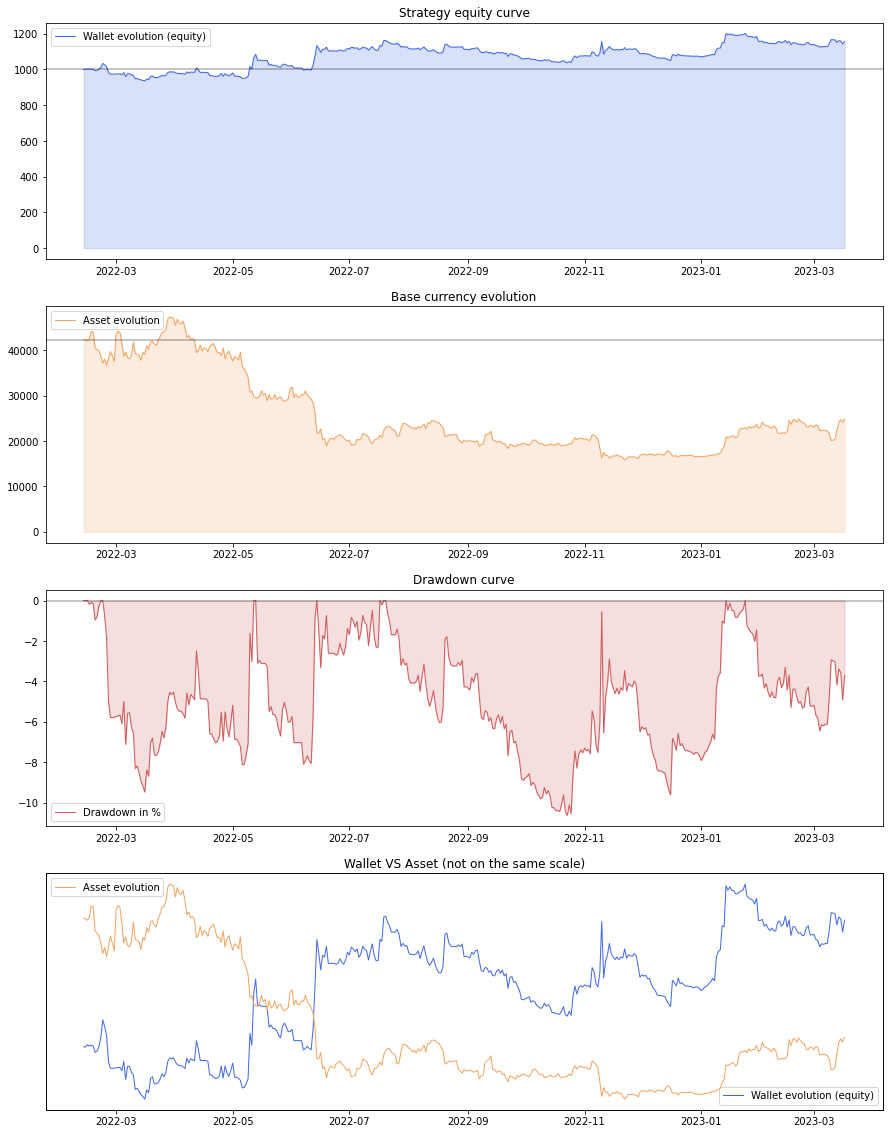

In [34]:
plot_wallet_vs_asset(df_days=df_days.loc[:])

In [ ]:
plot_bar_by_month(df_days=df_days)

In [155]:
df

Open      High       Low     Close      Volume  \
timestamp                                                                 
2022-03-12 00:00:00  38729.57  39161.21  38660.52  39144.28  1225.37891   
2022-03-12 01:00:00  39144.28  39327.99  39067.97  39185.00  1240.22315   
2022-03-12 02:00:00  39184.99  39268.37  39044.28  39124.47   827.24979   
2022-03-12 03:00:00  39124.47  39237.48  39080.24  39088.94   905.22722   
2022-03-12 04:00:00  39088.93  39196.51  38931.80  39108.00   976.48662   
...                       ...       ...       ...       ...         ...   
2023-03-02 04:00:00  23494.29  23546.82  23469.43  23536.33  4693.64663   
2023-03-02 05:00:00  23536.34  23544.76  23410.65  23445.71  6316.91756   
2023-03-02 06:00:00  23445.48  23474.35  23374.46  23437.86  8081.01585   
2023-03-02 07:00:00  23437.86  23448.08  23335.41  23391.87  8862.36324   
2023-03-02 08:00:00  23391.87  23413.08  23352.83  23355.37  4489.53518   

                             Ctime              Quotes  Trades     Taker base  \
timestamp                                                                       
2022-03-12 00:00:00  1647046799999   47715556.21645530   35255   666.14848000   
2022-03-12 01:00:00  1647050399999   48611634.01269380   34012   591.36624000   
2022-03-12 02:00:00  1647053999999   32397701.47054740   28931   379.74204000   
2022-03-12 03:00:00  1647057599999   35438067.06641290   25820   387.65344000   
2022-03-12 04:00:00  1647061199999   38151168.81719480   25816   467.30171000   
...                            ...                 ...     ...            ...   
2023-03-02 04:00:00  1677733199999  110308907.42283080  199614  2374.91300000   
2023-03-02 05:00:00  1677736799999  148293975.11550340  230958  2985.11540000   
2023-03-02 06:00:00  1677740399999  189384032.95706540  294140  3920.81935000   
2023-03-02 07:00:00  1677743999999  207308240.58018440  307116  4351.12551000   
2023-03-02 08:00:00  1677747599999  105005246.16420720  169935  2193.55417000   

                            Taker quote Ignore        EMA200        RSI  \
timestamp                                                                 
2022-03-12 00:00:00   25943708.67319440      0           NaN        NaN   
2022-03-12 01:00:00   23181588.00531290      0           NaN        NaN   
2022-03-12 02:00:00   14873969.79802580      0           NaN        NaN   
2022-03-12 03:00:00   15175139.19165640      0           NaN        NaN   
2022-03-12 04:00:00   18256500.12575360      0           NaN        NaN   
...                                 ...    ...           ...        ...   
2023-03-02 04:00:00   55816462.47333050      0  23568.416876  47.707843   
2023-03-02 05:00:00   70076039.71118570      0  23567.195912  40.936240   
2023-03-02 06:00:00   91890113.82903380      0  23565.908987  40.384519   
2023-03-02 07:00:00  101780076.22271830      0  23564.177256  37.127235   
2023-03-02 08:00:00   51307657.72733780      0  23562.099572  34.661878   

                          macd     macd_s     macd_h  
timestamp                                             
2022-03-12 00:00:00        NaN        NaN        NaN  
2022-03-12 01:00:00        NaN        NaN        NaN  
2022-03-12 02:00:00        NaN        NaN        NaN  
2022-03-12 03:00:00        NaN        NaN        NaN  
2022-03-12 04:00:00        NaN        NaN        NaN  
...                        ...        ...        ...  
2023-03-02 04:00:00  -4.044956  16.280731 -20.325688  
2023-03-02 05:00:00 -12.277241  10.569137 -22.846378  
2023-03-02 06:00:00 -19.213336   4.612642 -23.825978  
2023-03-02 07:00:00 -28.097361  -1.929359 -26.168003  
2023-03-02 08:00:00 -37.649263  -9.073339 -28.575924  

[8529 rows x 16 columns]

In [124]:
prices_resample = df

In [119]:
def ajouter_indicateurs(df):
    df['MA20'] = df['Close'].rolling(20).mean()
    df['MA50'] = df['Close'].rolling(50).mean()
    df['MA150'] = df['Close'].rolling(150).mean()
    df['C9'] = 9
    # Calculate  MACD  ...
    # Autor YT : Learn Python with Rune
    # 48,9 k abonnés
    # MACD and Stochastic Oscillator | Full Course | Part 7/8 | Financial Data Analysis with Python ...
    # https://www.youtube.com/watch?v=jddmdKDq_VQ
    # https://www.youtube.com/watch?v=jddmdKDq_VQ
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['MACD Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # df["RSI"] = ta.rsi(df.Close, length=25)       # with the pandas_ta lib ...
    df["RSI"] = ta.rsi(df.MACD, length=25)       # with the pandas_ta lib ...

    adx = df.ta.adx()
    stc = df.ta.stc()

    return df

In [125]:
ajouter_indicateurs(prices_resample)

Open      High       Low     Close       Volume  \
timestamp                                                                  
2022-03-12 00:00:00  38729.57  39161.21  38660.52  39144.28   1225.37891   
2022-03-12 01:00:00  39144.28  39327.99  39067.97  39185.00   1240.22315   
2022-03-12 02:00:00  39184.99  39268.37  39044.28  39124.47    827.24979   
2022-03-12 03:00:00  39124.47  39237.48  39080.24  39088.94    905.22722   
2022-03-12 04:00:00  39088.93  39196.51  38931.80  39108.00    976.48662   
...                       ...       ...       ...       ...          ...   
2023-03-01 13:00:00  23722.60  23735.17  23616.45  23689.45  12613.43277   
2023-03-01 14:00:00  23689.97  23888.00  23570.00  23679.86  23100.28180   
2023-03-01 15:00:00  23679.86  23770.00  23550.80  23711.09  25931.50196   
2023-03-01 16:00:00  23711.09  23746.24  23555.06  23691.90  20056.88622   
2023-03-01 17:00:00  23692.54  23744.31  23669.30  23713.08   4608.63723   

                             Ctime              Quotes  Trades  \
timestamp                                                        
2022-03-12 00:00:00  1647046799999   47715556.21645530   35255   
2022-03-12 01:00:00  1647050399999   48611634.01269380   34012   
2022-03-12 02:00:00  1647053999999   32397701.47054740   28931   
2022-03-12 03:00:00  1647057599999   35438067.06641290   25820   
2022-03-12 04:00:00  1647061199999   38151168.81719480   25816   
...                            ...                 ...     ...   
2023-03-01 13:00:00  1677679199999  298697784.61478620  368791   
2023-03-01 14:00:00  1677682799999  547937156.01824870  565544   
2023-03-01 15:00:00  1677686399999  614024614.16095690  621542   
2023-03-01 16:00:00  1677689999999  474332928.53155180  509570   
2023-03-01 17:00:00  1677693599999  109262600.26779030  133223   

                         Taker base         Taker quote  ...        RSI  \
timestamp                                                ...              
2022-03-12 00:00:00    666.14848000   25943708.67319440  ...        NaN   
2022-03-12 01:00:00    591.36624000   23181588.00531290  ...        NaN   
2022-03-12 02:00:00    379.74204000   14873969.79802580  ...        NaN   
2022-03-12 03:00:00    387.65344000   15175139.19165640  ...        NaN   
2022-03-12 04:00:00    467.30171000   18256500.12575360  ...        NaN   
...                             ...                 ...  ...        ...   
2023-03-01 13:00:00   6068.84582000  143716901.80598270  ...  66.254323   
2023-03-01 14:00:00  11432.35650000  271182236.45809530  ...  64.672226   
2023-03-01 15:00:00  13052.38274000  309078589.80804720  ...  63.785949   
2023-03-01 16:00:00  10112.31318000  239159306.41101810  ...  62.405178   
2023-03-01 17:00:00   2290.91095000   54315700.89543570  ...  61.494443   

                           macd     macd_s     macd_h        MA20        MA50  \
timestamp                                                                       
2022-03-12 00:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 01:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 02:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 03:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 04:00:00         NaN        NaN        NaN         NaN         NaN   
...                         ...        ...        ...         ...         ...   
2023-03-01 13:00:00  104.343376  82.363939  21.979437  23504.5205  23455.7198   
2023-03-01 14:00:00   98.243745  85.539900  12.703845  23514.4320  23461.2534   
2023-03-01 15:00:00   94.836526  87.399225   7.437301  23536.7685  23461.4150   
2023-03-01 16:00:00   89.555469  87.830474   1.724995  23557.7610  23459.1838   
2023-03-01 17:00:00   86.086885  87.481756  -1.394871  23586.4205  23462.2574   

                            MA150  C9        MACD  MACD Signal  
timestamp                                                       
2022-03-12 00:00:

In [126]:
def ajouter_stc_indicateurs(df):

    adx = df.ta.adx()
    stc = df.ta.stc()

    return df

In [127]:
ajouter_stc_indicateurs(prices_resample)

Open      High       Low     Close       Volume  \
timestamp                                                                  
2022-03-12 00:00:00  38729.57  39161.21  38660.52  39144.28   1225.37891   
2022-03-12 01:00:00  39144.28  39327.99  39067.97  39185.00   1240.22315   
2022-03-12 02:00:00  39184.99  39268.37  39044.28  39124.47    827.24979   
2022-03-12 03:00:00  39124.47  39237.48  39080.24  39088.94    905.22722   
2022-03-12 04:00:00  39088.93  39196.51  38931.80  39108.00    976.48662   
...                       ...       ...       ...       ...          ...   
2023-03-01 13:00:00  23722.60  23735.17  23616.45  23689.45  12613.43277   
2023-03-01 14:00:00  23689.97  23888.00  23570.00  23679.86  23100.28180   
2023-03-01 15:00:00  23679.86  23770.00  23550.80  23711.09  25931.50196   
2023-03-01 16:00:00  23711.09  23746.24  23555.06  23691.90  20056.88622   
2023-03-01 17:00:00  23692.54  23744.31  23669.30  23713.08   4608.63723   

                             Ctime              Quotes  Trades  \
timestamp                                                        
2022-03-12 00:00:00  1647046799999   47715556.21645530   35255   
2022-03-12 01:00:00  1647050399999   48611634.01269380   34012   
2022-03-12 02:00:00  1647053999999   32397701.47054740   28931   
2022-03-12 03:00:00  1647057599999   35438067.06641290   25820   
2022-03-12 04:00:00  1647061199999   38151168.81719480   25816   
...                            ...                 ...     ...   
2023-03-01 13:00:00  1677679199999  298697784.61478620  368791   
2023-03-01 14:00:00  1677682799999  547937156.01824870  565544   
2023-03-01 15:00:00  1677686399999  614024614.16095690  621542   
2023-03-01 16:00:00  1677689999999  474332928.53155180  509570   
2023-03-01 17:00:00  1677693599999  109262600.26779030  133223   

                         Taker base         Taker quote  ...        RSI  \
timestamp                                                ...              
2022-03-12 00:00:00    666.14848000   25943708.67319440  ...        NaN   
2022-03-12 01:00:00    591.36624000   23181588.00531290  ...        NaN   
2022-03-12 02:00:00    379.74204000   14873969.79802580  ...        NaN   
2022-03-12 03:00:00    387.65344000   15175139.19165640  ...        NaN   
2022-03-12 04:00:00    467.30171000   18256500.12575360  ...        NaN   
...                             ...                 ...  ...        ...   
2023-03-01 13:00:00   6068.84582000  143716901.80598270  ...  66.254323   
2023-03-01 14:00:00  11432.35650000  271182236.45809530  ...  64.672226   
2023-03-01 15:00:00  13052.38274000  309078589.80804720  ...  63.785949   
2023-03-01 16:00:00  10112.31318000  239159306.41101810  ...  62.405178   
2023-03-01 17:00:00   2290.91095000   54315700.89543570  ...  61.494443   

                           macd     macd_s     macd_h        MA20        MA50  \
timestamp                                                                       
2022-03-12 00:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 01:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 02:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 03:00:00         NaN        NaN        NaN         NaN         NaN   
2022-03-12 04:00:00         NaN        NaN        NaN         NaN         NaN   
...                         ...        ...        ...         ...         ...   
2023-03-01 13:00:00  104.343376  82.363939  21.979437  23504.5205  23455.7198   
2023-03-01 14:00:00   98.243745  85.539900  12.703845  23514.4320  23461.2534   
2023-03-01 15:00:00   94.836526  87.399225   7.437301  23536.7685  23461.4150   
2023-03-01 16:00:00   89.555469  87.830474   1.724995  23557.7610  23459.1838   
2023-03-01 17:00:00   86.086885  87.481756  -1.394871  23586.4205  23462.2574   

                            MA150  C9        MACD  MACD Signal  
timestamp                                                       
2022-03-12 00:00:

In [20]:
# YT : Pandas TA Tutorial...
# YT : https://www.youtube.com/watch?v=lij39o0_L2I
# YT : https://www.youtube.com/watch?v=lij39o0_L2I
stc = df.ta.stc()
macd= df.ta.macd() # macd= df.ta.macd(fast=14, slow=28)
rsi= df.ta.rsi()
df = pd.concat([df,stc, macd, rsi], axis=1)
df['RSI_14'] = df.ta.rsi()

In [15]:
rsi

timestamp
2022-03-12 00:00:00          NaN
2022-03-12 01:00:00          NaN
2022-03-12 02:00:00          NaN
2022-03-12 03:00:00          NaN
2022-03-12 04:00:00          NaN
                         ...    
2023-03-03 04:00:00    26.785365
2023-03-03 05:00:00    26.236312
2023-03-03 06:00:00    27.929513
2023-03-03 07:00:00    27.597915
2023-03-03 08:00:00    28.222189
Name: RSI_14, Length: 8553, dtype: float64

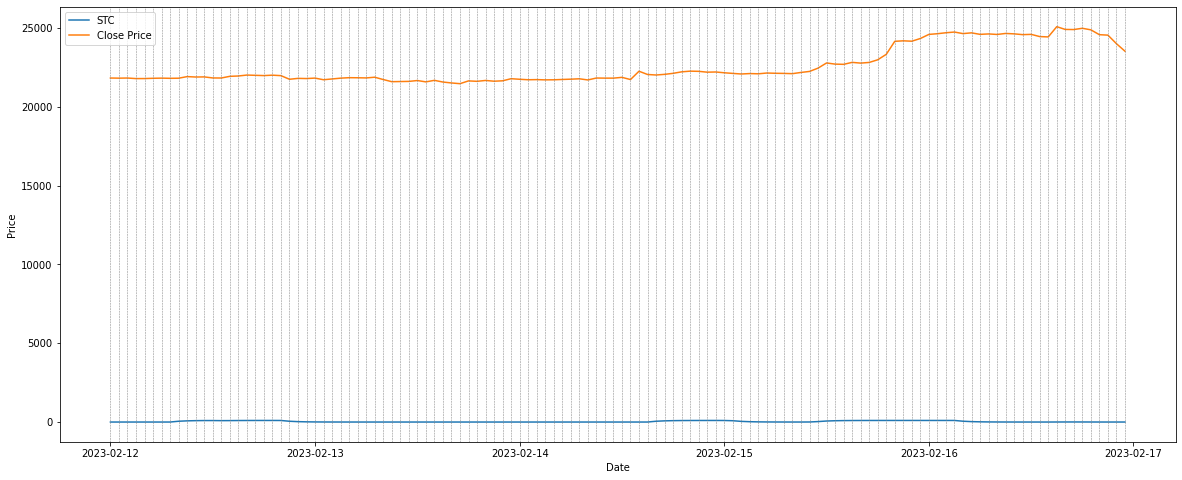

In [158]:
import matplotlib.pyplot as plt

# Generated with ChatGPT  .....
# Generated with ChatGPT  .....
# Generated with ChatGPT  .....

# Set figure size
plt.figure(figsize=(20, 8))

# Slice the STC dataframe for the desired date range
stc_slice = stc['2023-02-12':'2023-02-16']

# Plot the sliced STC values
plt.plot(stc_slice.index, stc_slice['STC_10_12_26_0.5'], label='STC')

# Plot STC values
# plt.plot(stc.index, stc['STC_10_12_26_0.5'], label='STC')

# Plot the close price
close_slice = df['Close']['2023-02-12':'2023-02-16']
plt.plot(close_slice.index, close_slice, label='Close Price')



# Add vertical line for each date
for date in stc_slice.index:
    plt.axvline(date, color='grey', linestyle='--', linewidth=0.5)

# Add legend and axis labels
plt.legend()
plt.xlabel('Date')
# plt.ylabel('STC')
plt.ylabel('Price')

# Show plot
plt.show()

<Figure size 1440x576 with 0 Axes>

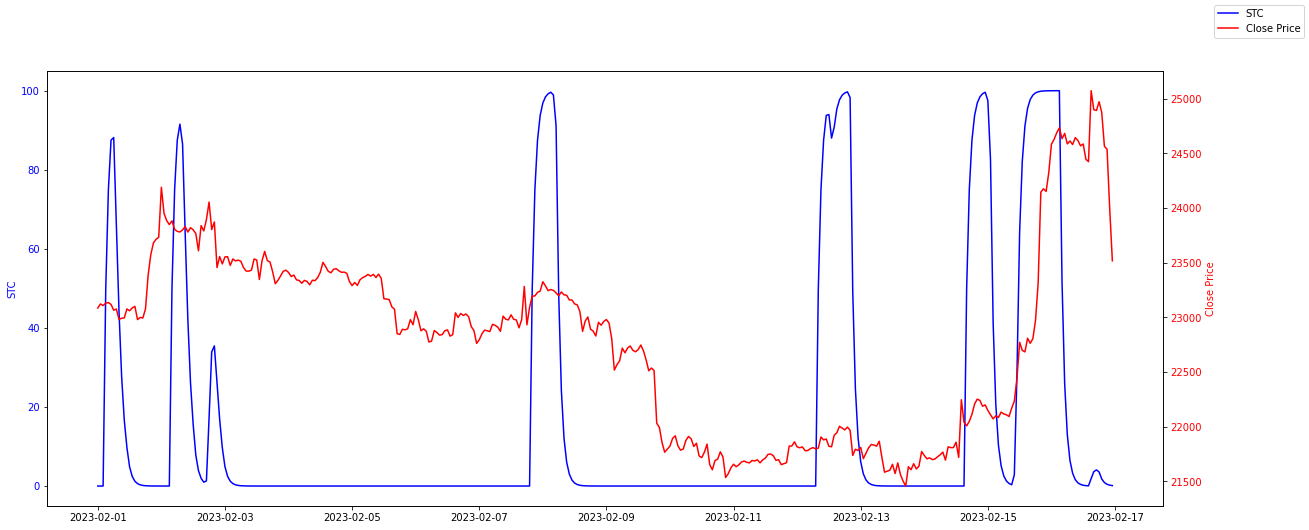

In [9]:
# Generated with ChatGPT  .....
# Generated with ChatGPT  .....
# Generated with ChatGPT  .....
import matplotlib.pyplot as plt
# STC.
# STC.
# STC.
# STC.
# Set figure size
plt.figure(figsize=(20, 8))

# Slice the STC dataframe for the desired date range
stc_slice = stc['2023-02-01':'2023-02-16']

# Create a new y-axis for the STC values
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 8)
ax1.plot(stc_slice.index, stc_slice['STC_10_12_26_0.5'], label='STC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylabel('STC', color='blue')

# Plot the close price on the same plot with a secondary y-axis
ax2 = ax1.twinx()
close_slice = df['Close']['2023-02-01':'2023-02-16']
ax2.plot(close_slice.index, close_slice, label='Close Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Close Price', color='red')

# Add vertical line for each date
#for date in stc_slice.index:
#    ax1.axvline(date, color='grey', linestyle='--', linewidth=0.5)

# Add legend and axis labels
fig.legend()
# fig.xlabel('Date')

# Show plot
plt.show()


<Figure size 1440x576 with 0 Axes>

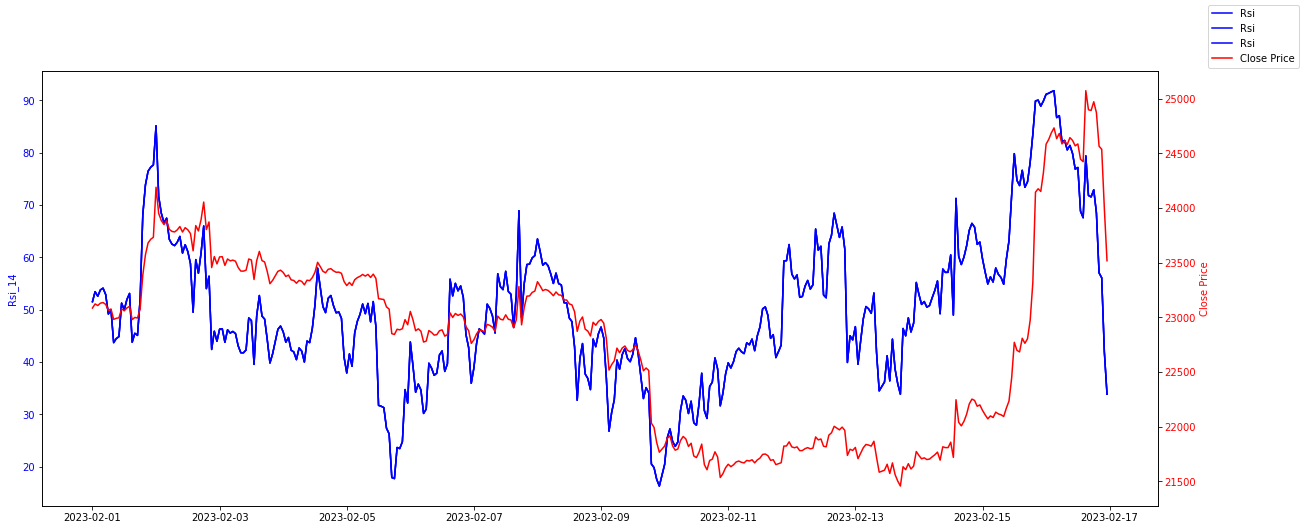

In [25]:
# Generated with ChatGPT  .....
# Generated with ChatGPT  .....
# Generated with ChatGPT  .....
import matplotlib.pyplot as plt
# RSI.
# RSI.
# RSI.
# Set figure size
plt.figure(figsize=(20, 8))

# Slice the RSI dataframe for the desired date range
#rsi_slice = rsi['2023-02-01':'2023-02-16']

# Create a new y-axis for the RSI values
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 8)

rsi_slice = df['RSI_14']['2023-02-01':'2023-02-16']
ax1.plot(rsi_slice.index, rsi_slice, label='Rsi', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylabel('Rsi_14', color='blue')

#ax1.plot(rsi_slice.index, rsi_slice['RSI_14'], label='RSI', color='blue')
#ax1.tick_params(axis='y', labelcolor='blue')
#ax1.set_ylabel('RSI', color='blue')

# Plot the close price on the same plot with a secondary y-axis
ax2 = ax1.twinx()
close_slice = df['Close']['2023-02-01':'2023-02-16']
ax2.plot(close_slice.index, close_slice, label='Close Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Close Price', color='red')

# Add vertical line for each date
#for date in rsi_slice.index:
#    ax1.axvline(date, color='grey', linestyle='--', linewidth=0.5)

# Add legend and axis labels
fig.legend()
# fig.xlabel('Date')

# Show plot
plt.show()

In [141]:
def visualise_stc(df):
    # With Chat GPT  .....
    # With Chat GPT  .....
    # With Chat GPT  .....
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(20,20))

    """
    df[['MACD','MACD Signal','C9']]['2023-02-05':'2023-02-28'].plot(ax=ax)

    for date in df[['MACD','MACD Signal','C9']]['2023-02-05':'2023-02-28'].index:
    ax.axvline(date, linestyle='--', color='gray')
    """

    df[['stc']]['2023-02-12':'2023-02-16'].plot(ax=ax)

    for date in df[['stc']]['2023-02-12':'2023-02-16'].index:
        #ax.axvline(date, linestyle='--', color='gray')
        ax.axvline(date)

    # df[['Close','MA20','MA50','MA150']]['2023-02-12':'2023-02-16'].plot(ax=ax, alpha=0.75, secondary_y=True)

    plt.show()

In [ ]:
visualise_stc(df)

In [132]:
def visualise(df):
    # With Chat GPT  .....
    # With Chat GPT  .....
    # With Chat GPT  .....
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(20,20))

    """
    df[['MACD','MACD Signal','C9']]['2023-02-05':'2023-02-28'].plot(ax=ax)

    for date in df[['MACD','MACD Signal','C9']]['2023-02-05':'2023-02-28'].index:
    ax.axvline(date, linestyle='--', color='gray')
    """

    df[['RSI']]['2023-02-12':'2023-02-16'].plot(ax=ax)

    for date in df[['RSI']]['2023-02-12':'2023-02-16'].index:
        #ax.axvline(date, linestyle='--', color='gray')
        ax.axvline(date)

    # Add vertical line for each date STC example ...from Chat GPT ...
    #for date in stc_slice.index:
    #    plt.axvline(date, color='grey', linestyle='--', linewidth=0.5)


    df[['Close','MA20','MA50','MA150']]['2023-02-12':'2023-02-16'].plot(ax=ax, alpha=0.75, secondary_y=True)

    plt.show()

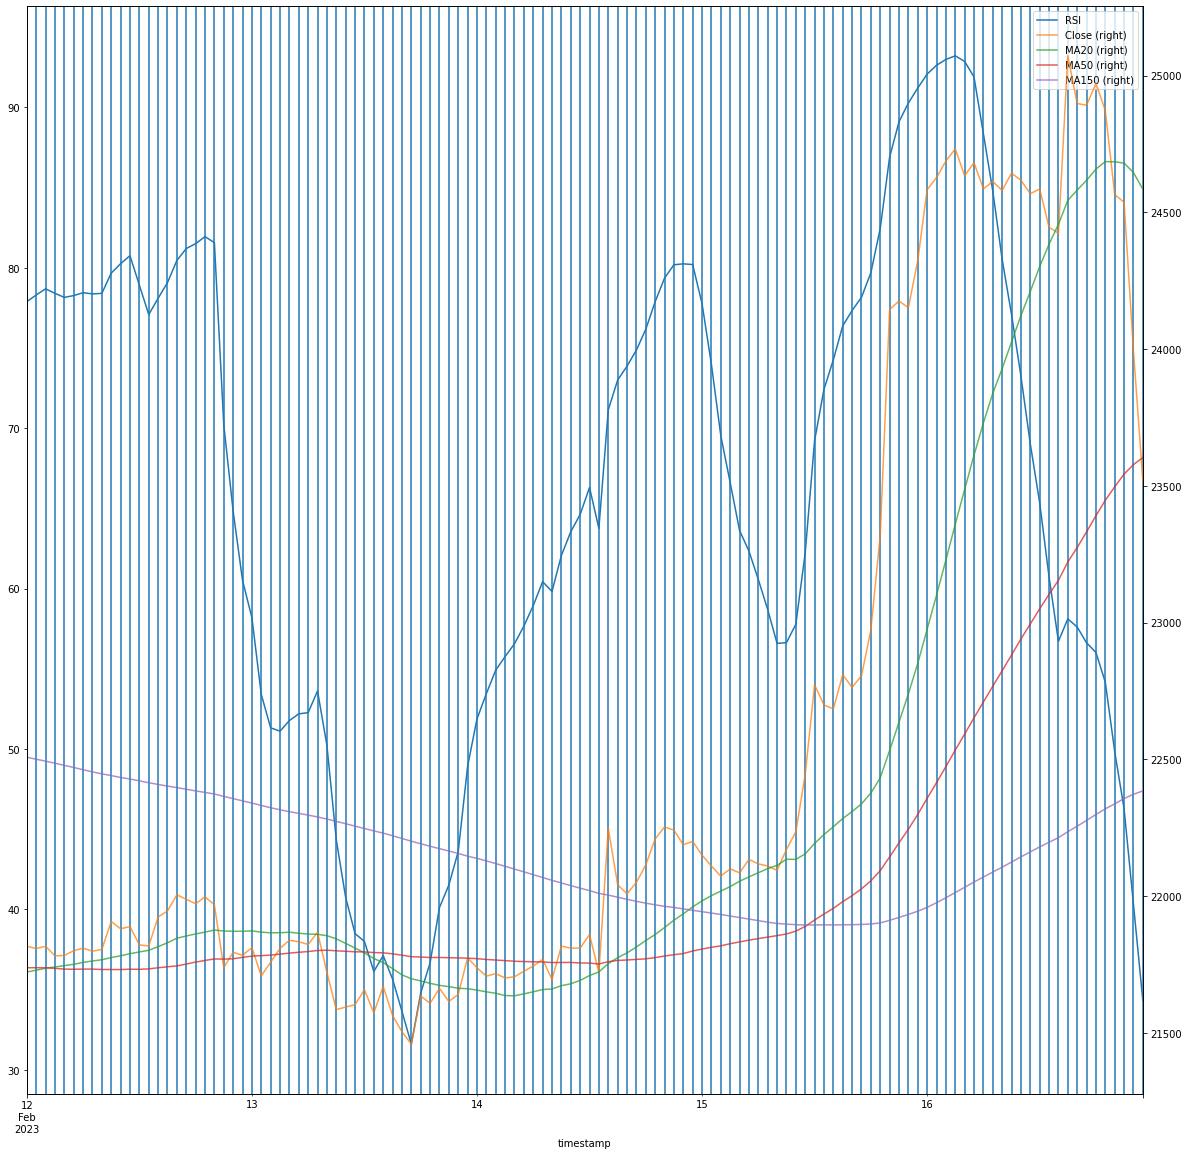

In [133]:
visualise(prices_resample)

<AxesSubplot:>

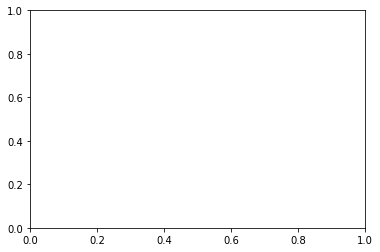

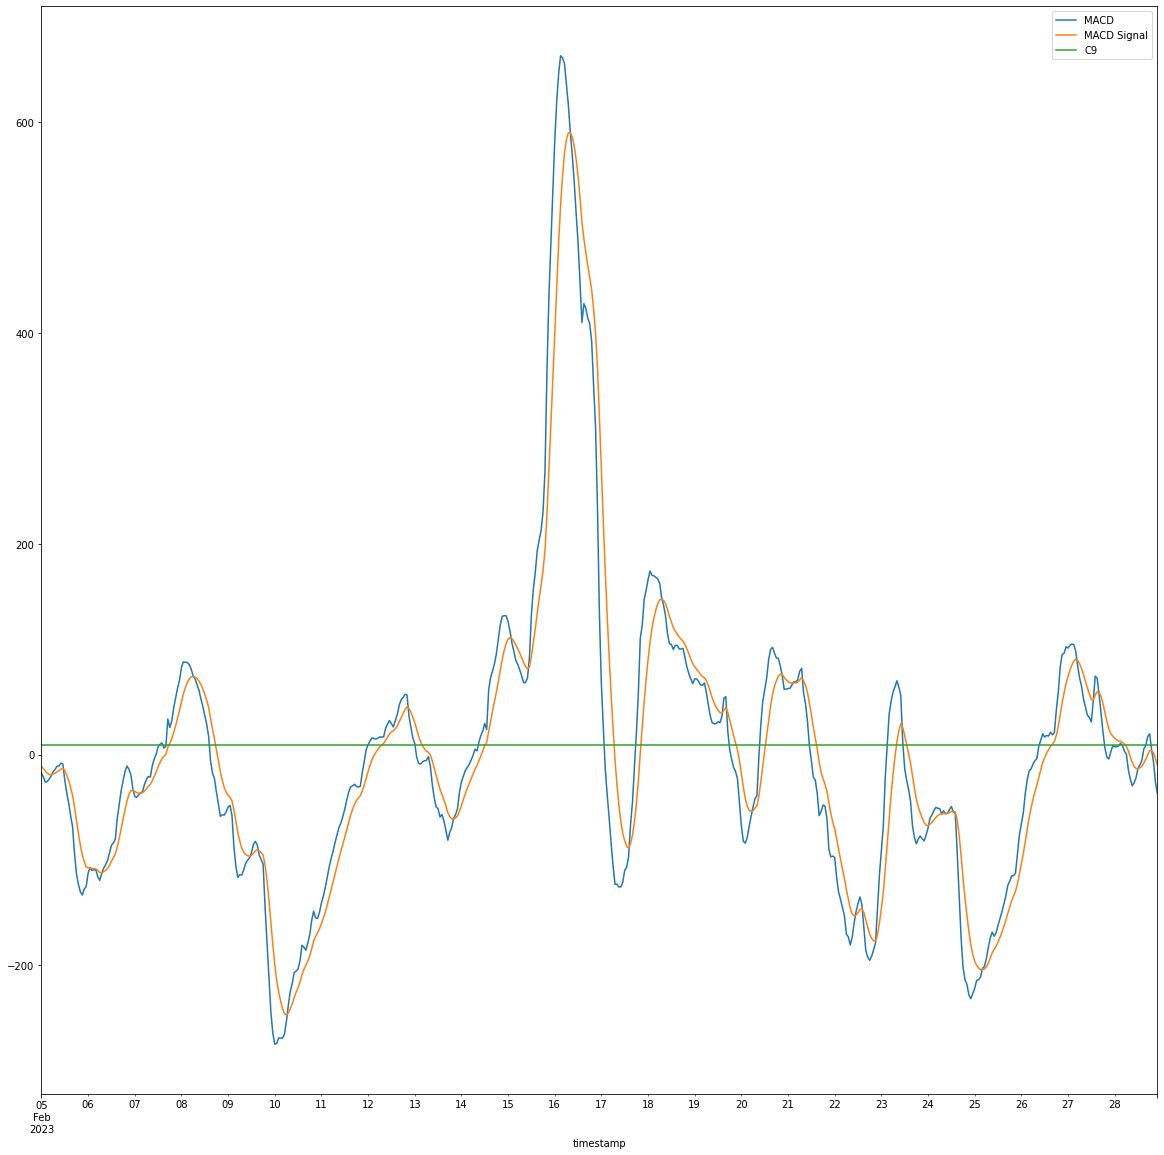

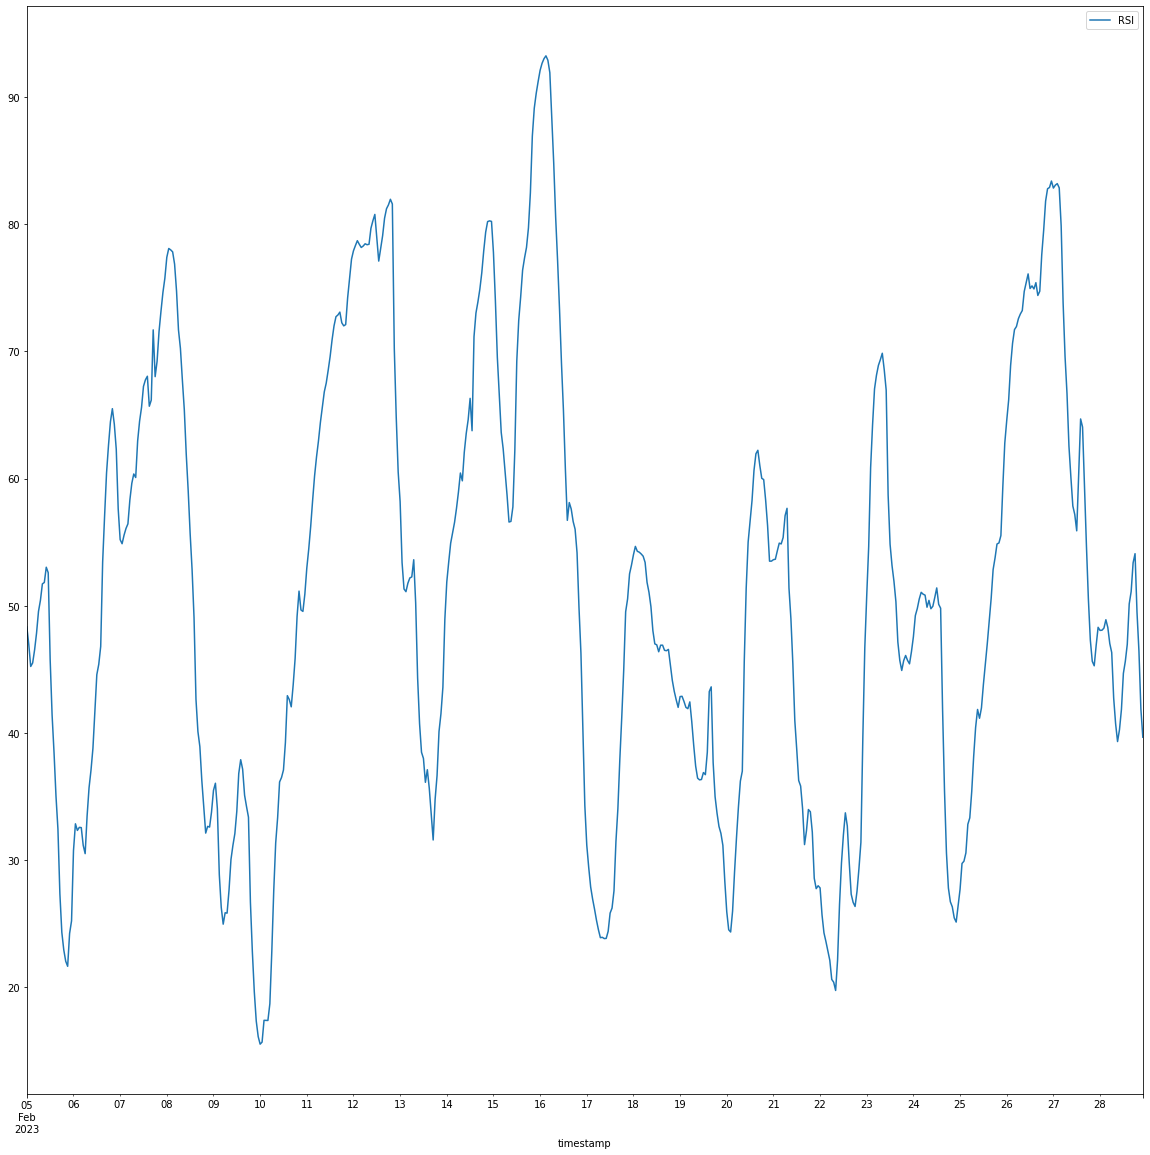

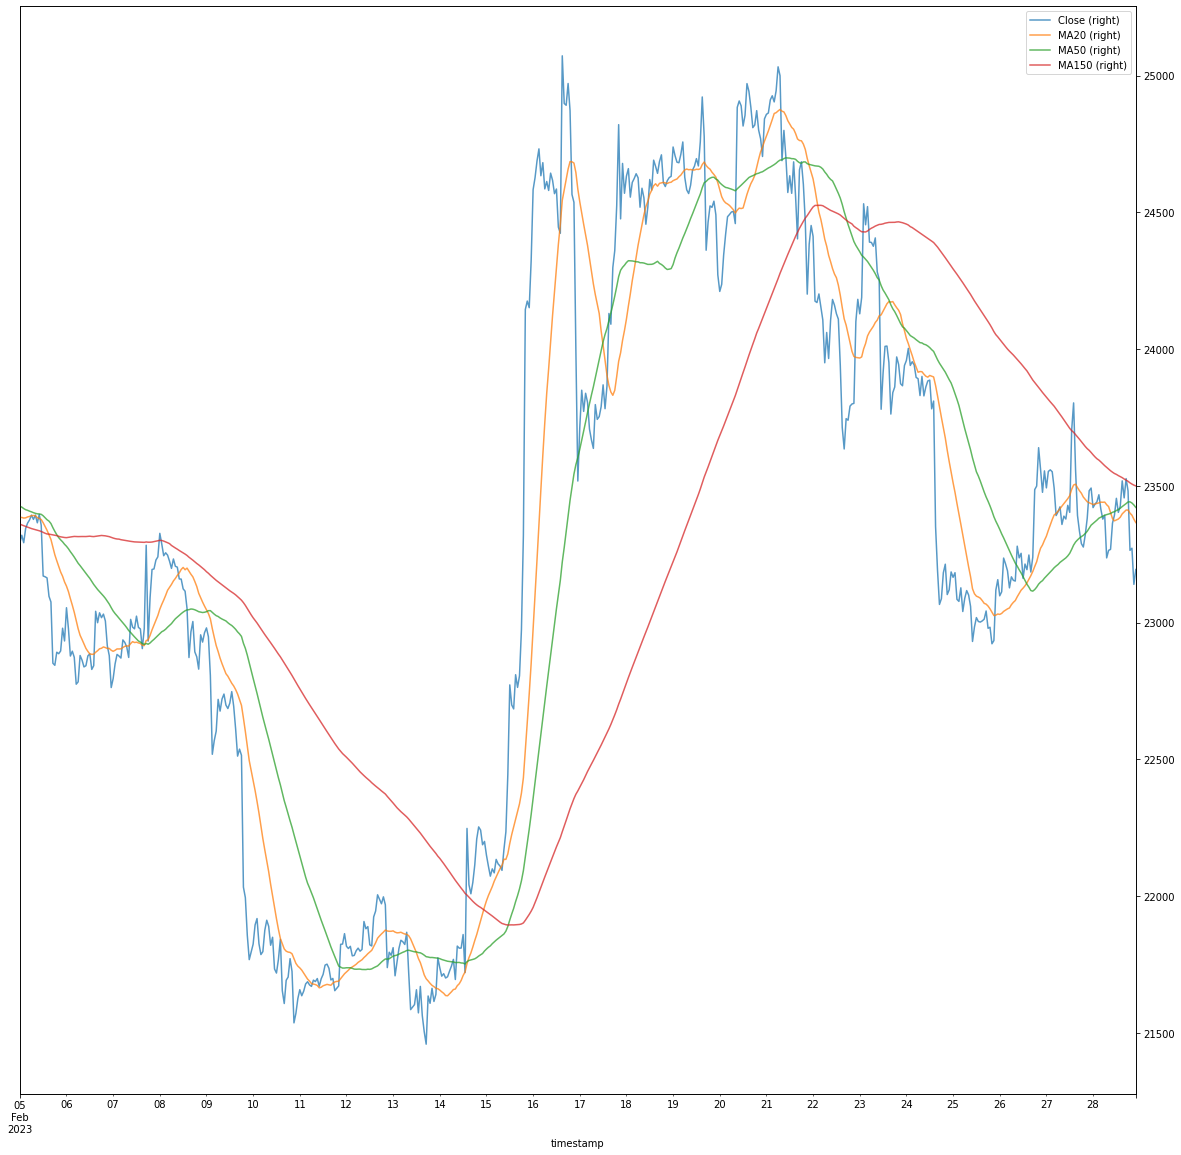

In [41]:
#  Plot   MACD - RSI - PRICE  ...
# Autor YT : Learn Python with Rune
# 48,9 k abonnés
# MACD and Stochastic Oscillator | Full Course | Part 7/8 | Financial Data Analysis with Python ...
# https://www.youtube.com/watch?v=jddmdKDq_VQ
# https://www.youtube.com/watch?v=jddmdKDq_VQ
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# prices_resample[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-10-05':'2022-10-22'].plot(figsize=(20,20))
#prices_resample[['MACD','MACD Signal']].plot(ax=ax)
prices_resample[['MACD','MACD Signal','C9']]['2023-02-05':'2023-02-28'].plot(figsize=(20,20))

prices_resample[['RSI']]['2023-02-05':'2023-02-28'].plot(figsize=(20,20))
# prices_resample[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-10-05':'2022-10-06'].plot(alpha=0.75, secondary_y=True, figsize=(20,20))
prices_resample[['Close','MA20','MA50','MA150']]['2023-02-05':'2023-02-28'].plot(alpha=0.75, secondary_y=True, figsize=(20,20))
#plt3.axhline(p[2], c= (.5,.5,.5), ls='--')
#plt.axvline(2, c= (.5,.5,.5), ls='--')#

In [7]:
def strategy(entry, loockback, qty, open_position=False):
  while True:
    # time.sleep(0.5)
    df=pd.read_sql('BTCUSDT', engine)
    lookbackperiod = df.iloc [-loockback:]
    cumret = (lookbackperiod.Price.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Price'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Price'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    
    if not open_position :
      if (cumret [cumret.last_valid_index()] > entry and
          df.Price.iloc[-1] > df.sma21.iloc[-1] and
          df.slope21.iloc[-1] > 0):
          order = client.create_order(symbol='BTCUSDT' ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=qty)
          print(order)
          print('BUY :::')
          print('BuyPrice : ', df.Price.iloc[-1] )
          open_position = True
          break
  if open_position:
      while True:
        df = pd.read_sql('BTCUSDT', engine)
        sincebuy = df.loc[df.time >
                          pd.to_datetime(order['transactTime'], 
                          unit='ms')]
        if len(sincebuy) > 1:
          sincebuyret = (sincebuy.Price.pct_change() +1).cumprod() - 1
          last_entry = sincebuyret[sincebuyret.last_valid_index()]
          if last_entry > 0.0010 or last_entry < -0.0010:
            order = client.create_order(symbol='BTCUSDT',
                                         side='SELL',
                                         type='MARKET',
                                         quantity=qty)
            print(order)
            print('SELL :::')
            print('SellPrice : ', df.Price.iloc[-1] )

            # Test Price succes et mettre resultat dans summary ...

            open_position = False
            break

In [7]:
# LE SCREENER  2 ........................................................
# Function to get minute by minute...
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  
        
    frame = frame.iloc[:,:6]  # Select First six colonnes .....
    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
    frame = frame.set_index('Time')  # Set time to index  ...
    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
    frame = frame.astype(float)  # transform string to float
    return frame

In [96]:
def strategyENGULFING(symbol,open_position=False):   # <<<-------  10 JUIN 2022  -------
# def strategyENGULFING(symbol, qty, open_position=False):  
 #     ---------------   DEBUT  10 JUIN 2022   DEBUT  -------------------------
    print('Look  at ::: ', symbol)
       
    invest = 40  #  Dollars ....
    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    buy_qty = round(invest/prize, 3 )    
    #     ---------------   FIN  10 JUIN 2022   FIN  -------------------------
#.def strategyENGULFING(entry, loockback, qty, open_position=False):
  #.while True:
    # time.sleep(0.5)
    # df=pd.read_sql('BTCUSDT', engine)
    df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes .
    #.df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 minutes pour 12 heures..
    
    #..lookbackperiod = df.iloc [-loockback:]
    #..cumret = (lookbackperiod.Open.pct_change() +1).cumprod() - 1

    #--- CALCULATE  MACD ---
    #https://www.alpharithms.com/calculate-macd-python-272222/
    #https://www.alpharithms.com/calculate-macd-python-272222/
    # Get the 12-day EMA of the closing price--- MACD---
    k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
    # Get the 26-day EMA of the closing price
    d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()    
    # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
    macd = k - d
    # Get the 9-Day EMA of the MACD for the Trigger line
    macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
    # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
    macd_h = macd - macd_s
    # Add all of our new values for the MACD to the dataframe
    df['macd'] = df.index.map(macd)
    df['macd_s'] = df.index.map(macd_s)
    df['macd_h'] = df.index.map(macd_h)   # <<<--- MACD Histogramme ...
    #--- FIN  CALCULATE  MACD FIN ---   
    #--- CALCULATE  RSI-STOCHASTIC  --- 
    # https://www.alpharithms.com/stochastic-oscillator-in-python-483214/
    # https://www.alpharithms.com/stochastic-oscillator-in-python-483214/
#...    import pandas_ta as ta
    # Add some indicators
#...    df.ta.stoch(high='high', low='low', k=14, d=3, append=True)    
    #--- FIN  CALCULATE  RSI-STOCHASTIC FIN ---   
     
    #--- CALCULATE  EMA 50 ---
    df['sma50'] = df['Close'].rolling(50).mean() # <<<--- SMA 50 --------..    
    #--- FIN CALCULATE  EMA 50 FIN ---


    df['sma9'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Close'].rolling(21).mean() # <<<--- SMA 21 --------..
    df['sma100'] = df['Close'].rolling(100).mean() # <<<--- SMA 100 --------..

    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    #bodydiff[row] = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiff = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiffprec = abs(df.Open.iloc[-2]-df.Close.iloc[-2])
    bodydiffmin = 0.003
    #if (not open_position and df.Close.iloc[-1] < 100):  # <<-- in_position ...
    if not open_position :  # <<-- in_position ...  
      #if (cumret [cumret.last_valid_index()] > entry and
      #    df.Price.iloc[-1] > df.sma21.iloc[-1] and
      #    df.slope21.iloc[-1] > 0):
#.    if (bodydiff > bodydiffmin and bodydiffprec > bodydiffmin and
      if (bodydiff > bodydiffmin and       
          df.Open.iloc[-2] > df.Close.iloc[-2] and
          df.Open.iloc[-1] < df.Close.iloc[-1] and

          df.Close.iloc[-1] > df.sma21.iloc[-1] and # <<< ---- check SMA 21 ...
          df.Close.iloc[-1] > df.sma9.iloc[-1] and # <<< ---- check SMA 9 ...
          df.Close.iloc[-1] > df.sma50.iloc[-1] and # <<< ---- check SMA 50 ou 100 ...          

          #df.sma9.iloc[-1] >= df.sma21.iloc[-1] and # <<< ---- check SMA 9 Crossed SMA21 ... 
          #((df.sma9.iloc[-2] < df.sma21.iloc[-2]) or (df.sma9.iloc[-3] < df.sma21.iloc[-3]) ) and
          
           #open[row]<=close[row-1] and close[row]>open[row-1]):
          (df.Open.iloc[-1]-df.Close.iloc[-2])<=-0e-5 and df.Close.iloc[-1]>df.Open.iloc[-2] 
          ):          
          # order = client.create_order(symbol='BTCUSDT' ,
          
          order = client.create_order(symbol=symbol ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=buy_qty)
          print(order)
       
               # index3 +=1  #  <<< ----   INDEX 3  ......
          print('BUY :::')
          BuyPrice = df.Close.iloc[-1]
          print('BuyPrice : ', df.Close.iloc[-1] )

          # -----------  BUY TIME  ----------------------
          # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
          # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
          # importing datetime module for now() 
          import datetime     
          # using now() to get current time 
          Buytime = datetime.datetime.now()   
          YearB = Buytime.year
          MonthB = Buytime.month 
          DayB = Buytime.day
          HourB = Buytime.hour
          MinuteB = Buytime.minute 
          SecondB = Buytime.second 
          # ----------END - BUY TIME -END---------------

          #return symbol, index3, buy_qty, BuyPrice, 0, 0
          
          open_position = True
          # open_position = False
          #return symbol, 0, buy_qty, BuyPrice, 0, 0

      elif (df.Close.iloc[-1] > df.sma50.iloc[-1]  and  # --- MACD STRATEGY MACD ---
            df.macd.iloc[-1] >= df.macd_s.iloc[-1] and # <<< ---- check cross MACD ... 
            df.macd.iloc[-2] < df.macd_s.iloc[-2]      
             ): 
          pass      
                   
      else:
          print('No ', symbol ,' ENGULFING Trade has been found executed')
          BuyPrice = df.Close.iloc[-1]

          #return symbol, BuyPrice,0, 0, 0, 0
          #return symbol, index3, buy_qty, BuyPrice, 0, 0
          #return symbol, 0, 0, BuyPrice, 0, 
          return symbol, 0, 0, BuyPrice, 0, 0,0,0,0,0,0,0,0,0,0,0
       

          #.break
    if open_position:     # <<-- in_position ...
        while True:
          #.df = pd.read_sql('BTCUSDT', engine)
          df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes ...
          sincebuy = df.loc[df.index >
                            pd.to_datetime(order['transactTime'], 
                            unit='ms')]
          if len(sincebuy) > 0:
            sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
            #. last_entry = sincebuyret[sincebuyret.last_valid_index()]
            #. if last_entry > 0.0010 or last_entry < -0.0010:
            #.if sincebuyret[-1] > 0.0017 or sincebuyret[-1] < -0.0007:
            if sincebuyret[-1] > 0.0014 or sincebuyret[-1] < -0.0007:    
              # order = client.create_order(symbol='BTCUSDT',
              order = client.create_order(symbol=symbol,
                                           side='SELL',
                                           type='MARKET',
                                           quantity=buy_qty)
              print(order)
              print('SELL :::')
              SellPrice = df.Close.iloc[-1]
              print('SellPrice : ', df.Close.iloc[-1] )

              # Test Price succes et mettre resultat dans summary ...
              #new_row = {'Symbol': symbol,
              #              'index3': index3,
              #                'Qty': buy_qty,
              #          'BuyPrice': BuyPrice,
              #          'Diff9-21': (SellPrice-BuyPrice),
              #          'SellPrice': SellPrice
              #          }
              #summary_2 = summary_2.append(new_row, ignore_index = True)
              # -----------  SELL TIME  ----------------------
              # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
              # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
              # importing datetime module for now() 
              #import datetime     
              # using now() to get current time 
              Selltime = datetime.datetime.now()   
              YearS = Selltime.year
              MonthS = Selltime.month 
              DayS = Selltime.day
              HourS = Selltime.hour
              MinuteS = Selltime.minute 
              SecondS = Selltime.second 
              # ----------END - SELL TIME -END---------------


              open_position = False
              # return symbol, 0, buy_qty, BuyPrice, 0, SellPrice
              return symbol, 0, buy_qty, BuyPrice, 0, SellPrice, YearB, MonthB, DayB, HourB, MinuteB, SecondB, DayS, HourS, MinuteS, SecondS
              break

            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN
    #. return symbol, BuyPrice
    #return symbol, 0, 0, 0, 0, 0 

In [62]:
def strategyENGULFING___BACKUP(symbol, index, open_position=False):   # <<<-------  10 JUIN 2022  -------
# def strategyENGULFING(symbol, qty, open_position=False):  
 #     ---------------   DEBUT  10 JUIN 2022   DEBUT  -------------------------
    print('Look  at ::: ', symbol)
    print('index_3 at ::: ', index)

    invest = 40  #  Dollars ....
    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    buy_qty = round(invest/prize, 3 )    
    #     ---------------   FIN  10 JUIN 2022   FIN  -------------------------
#.def strategyENGULFING(entry, loockback, qty, open_position=False):
  #.while True:
    # time.sleep(0.5)
    # df=pd.read_sql('BTCUSDT', engine)
    df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes .
    #.df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 minutes pour 12 heures..
    
    #..lookbackperiod = df.iloc [-loockback:]
    #..cumret = (lookbackperiod.Open.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Close'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    #bodydiff[row] = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiff = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiffprec = abs(df.Open.iloc[-2]-df.Close.iloc[-2])
    bodydiffmin = 0.003
    if not open_position :  # <<-- in_position ...
      #if (cumret [cumret.last_valid_index()] > entry and
      #    df.Price.iloc[-1] > df.sma21.iloc[-1] and
      #    df.slope21.iloc[-1] > 0):
      if (bodydiff > bodydiffmin and bodydiffprec > bodydiffmin and
          df.Open.iloc[-2] > df.Close.iloc[-2] and
          df.Open.iloc[-1] < df.Close.iloc[-1] and

          df.Close.iloc[-1] > df.sma21.iloc[-1] and # <<< ---- check SMA 21 ...
          df.Close.iloc[-1] > df.sma9.iloc[-1] and # <<< ---- check SMA 9 ...  
          df.sma9.iloc[-1] >= df.sma21.iloc[-1] and # <<< ---- check SMA 9 > SMA21 ... 

          # df.sma9.iloc[-2] < df.sma21.iloc[-2] and
           #open[row]<=close[row-1] and close[row]>open[row-1]):
          (df.Open.iloc[-1]-df.Close.iloc[-2])<=-0e-5 and df.Close.iloc[-1]>df.Open.iloc[-2] 
          ):          
          # order = client.create_order(symbol='BTCUSDT' ,
          order = client.create_order(symbol=symbol ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=buy_qty)
          print(order)
          index3 +=1  #  <<< ----   INDEX 3  ......
          print('BUY :::')
          BuyPrice = df.Close.iloc[-1]
          print('BuyPrice : ', df.Close.iloc[-1] )
          open_position = True
      else:
          print('No ', symbol ,' ENGULFING Trade has been found executed')    
          #.break
    if open_position:     # <<-- in_position ...
        while True:
          #.df = pd.read_sql('BTCUSDT', engine)
          df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes ...
          sincebuy = df.loc[df.index >
                            pd.to_datetime(order['transactTime'], 
                            unit='ms')]
          if len(sincebuy) > 0:
            sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
            #. last_entry = sincebuyret[sincebuyret.last_valid_index()]
            #. if last_entry > 0.0010 or last_entry < -0.0010:
            #.if sincebuyret[-1] > 0.0017 or sincebuyret[-1] < -0.0007:
            if sincebuyret[-1] > 0.0011 or sincebuyret[-1] < -0.0007:    
              # order = client.create_order(symbol='BTCUSDT',
              order = client.create_order(symbol=symbol,
                                           side='SELL',
                                           type='MARKET',
                                           quantity=buy_qty)
              print(order)
              print('SELL :::')
              SellPrice = df.Close.iloc[-1]
              print('SellPrice : ', df.Close.iloc[-1] )

              # Test Price succes et mettre resultat dans summary ...
              new_row = {'Symbol': symbol,
                            'index3': index3,
                              'Qty': buy_qty,
                        'BuyPrice': BuyPrice,
                        'Diff9-21': (SellPrice-BuyPrice),
                        'SellPrice': SellPrice
                        }

              #new_row = {'Symbol': symbol,
              #              'index3': index3,
              #                'Qty': buy_qty,
              #          'BuyPrice': BuyPrice,
              #          'Buytime': Buytime,
              #          'Diff9-21': diff9_21,
              #          'SellPrice': SellPrice,
              #          'Selltime': Selltime
              #          }
              summary_2 = summary_2.append(new_row, ignore_index = True)

              open_position = False
              break

            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 

In [ ]:
strategy(0.001, 300, 0.001)

In [ ]:
import time
open_position = False
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        strategy(0.001, 300, 0.001)

In [10]:
import time
open_position = False
while True:
    time.sleep(10) # <<< --- 60 pour 1 minute ...
    print('Test   Temp dattente  xx .......')
    # if not open_position:
    #     strategy(0.001, 300, 0.001)
    #     strategyENGULF(0.001, 300, 0.001)

Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......


KeyboardInterrupt: 

In [23]:
symbol ='BTCUSDT'
open_position = False
strategyENGULFING(symbol, 0.001)

No ENGULFING Trade has been found executed


In [220]:
# Buy quantity ....
symbol ='ENSUSDT'
invest = 40  #  Dollars ....
def buy_quantity(symbol, invest):

    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    print(lotsize)
    #test = str(lotsize).split('.')[1]
    #print(test)
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    long = len(str(lotsize).split('.')[0] )
    buy_qty = round(invest/prize, long )
    
    return buy_qty

In [221]:
buy_qty = buy_quantity(symbol, invest)
buy_qty

0.01


1.9

In [109]:

#buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
buy_qty = round(invest/prize, 3 )

In [111]:
buy_qty

0.194

In [222]:
import time

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        # Buy quantity ....
        symbol ='BTCUSDT'
        invest = 40  #  Dollars ....
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        #buy_qty = round(invest/prize, 3 )
        buy_qty = buy_quantity(symbol, invest)
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)    
   

    print('Test   Temps dattente  xx .......')
    time.sleep(60) # <<< --- 60 pour 1 minute ...
    
                                              

Test   Temps dattente  xx .......
1e-05
No  BTCUSDT  ENGULFING Trade has been found executed
Test   Temps dattente  xx .......


KeyboardInterrupt: 

In [79]:
"""
---------------------------  NEW SCREENER  ---------------------
---------------  ENGULFING     ENGULFING     ENGULFING     ENGULFING  ------------
--------------------    BINANCE 1 MINUTE  ---------------
JEUDI 07 AVRIL 2022
"""
# !pip install python-binance
from binance import Client
import pandas as pd
#import python_ta as ta
import numpy as np

client=Client()
tickersBinance = client.get_all_tickers() # << Get ALL TICKERS ....

# LE SCREENER  2 ........................................................
# Function to get minute by minute...
#def getminutedata(symbol, interval, lookback):
#    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  
#        
#    frame = frame.iloc[:,:6]  # Select First six colonnes .....
#    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
#    frame = frame.set_index('Time')  # Set time to index  ...
#    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
#    frame = frame.astype(float)  # transform string to float
#    return frame
#  ENGULFING  signals
import random
def Revsignal1(df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    sma21 = list(df1['21-day']) # <<< ---- check SMA 21 ... 
    sma9 = list(df1['9-day']) # <<< ---- check SMA 9 ...  
    sma100 = list(df1['100-day']) # <<< ---- check SMA 100 ...  
               
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(open[row]-close[row])
        bodydiffmin = 0.003
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]<close[row-1] and
            open[row]>close[row] and 

            #open[row]>=close[row-1] and close[row]<open[row-1]):
            (open[row]-close[row-1])>=+0e-5 and close[row]<open[row-1]):
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]>close[row-1] and
            open[row]<close[row] and

            close[row]>sma21[row] and # <<< ---- check SMA 21 ...
            close[row]>sma9[row] and # <<< ---- check SMA 9 ...  
            close[row]>sma100[row] and # <<< ---- check SMA 100 ...

            #sma9[row] > sma21[row] and # <<< ---- check SMA 9 Crossed SMA21 ...
            #sma9[row-1] < sma21[row-1] and                        

            #open[row]<=close[row-1] and close[row]>open[row-1]):
            (open[row]-close[row-1])<=-0e-5 and close[row]>open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2])
        #signal[row]=1
    return signal
#  ENGULFING  Target
def mytarget(df1, barsfront):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length

    piplim = 700e-5
  #  piplim = 500e-5      
  #  piplim = 300e-5
  # piplim = 100e-5    
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((high[line+i]-max(close[line],open[line]))>piplim) and ((min(close[line],open[line])-low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(close[line],open[line])-low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (high[line+i]-max(close[line],open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

#df['Trend'] = mytarget(df,3)
#df.head(30)

def TOP_ENGULFING(): # <<-- For New TOP Engulfing LIST..
    # LE SCREENER  2 .(SUITE) ................................................
    """
    CODE from  :  SP500_SCREENER_POLISH.ipynb  ( - POLISH - )
    05 Mars 2022
    YT ::: 
    Python enthusiast       <<<< ---  ---      ( - POLISH -)
    3,05 k abonnés
    https://www.youtube.com/watch?v=sXqvhmqzXqc
    GitHub CODE: 
    https://github.com/kosta93/Fundamenta...
    """

    # balance_sheet = []
    # income_statement = []
    # cfs = []
    # years = []
    # profitability_score = 0
    # leverage_score = 0
    # operating_efficiency_score = 0
    # pe_ratio = 0
    """
    summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])
    """
    summary = pd.DataFrame(columns = ['Symbol', 'index',
                                  'Qty', 'Rendement'])

    index =0
    # for ticker in tickers[5000:6010]:
    #for ticker in tickers[349:350]:
    #for ticker in tickers[99:100]:  
    #for ticker in tickers: 
    #for x in tickersBinance[0:500]:
    #for x in tickersBinance:
    #.for x in tickersBinance[416:418]:  # BTC/USDC  et BNB/USDC
    for x in tickersBinance:      
        try:
            # get_data(ticker)
            #..username = input("Enter username:")
            #..print("Username is: " + username)
            #get_data_2(ticker)
            #get_data_2_NEW(ticker)

            #...................LE SCREENER  2 .............................
            #..............................................................
            #df = getminutedata(x['symbol'], '1m', '15')
            #df = getminutedata(x['symbol'], '1m', '30') 
            #df = gethourdata(x['symbol'], '1h', '30') 
    #.  df = getdaydata(x['symbol'], '1d', '365')
    #.  df = gethourdata(x['symbol'], '1h', '730')  
            df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 pour 12 heures..
        #   df = getminutedata(x['symbol'], '1m', '1460') # <<-- 1460 pour 24 heures..        
    #      df = getminutedata(x['symbol'], '1m', '43200') # <<-- 43200 pour 1 moi..                                     
            symbol = x['symbol']
            #.applytechnicals(df)

            #Check if NA values are in data from ENGULFING ...
            df.isna().sum()    

            df['9-day'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
            df['21-day'] = df['Close'].rolling(18).mean() # <<<--- SMA 21 --------..
            #df['100-day'] = df['Close'].rolling(100).mean() # <<<--- SMA 100 --------..
            df['100-day'] = df['Close'].rolling(50).mean() # <<<--- SMA 100 --------..

            backrollingN = 10  #  <<<  ---  for SLOPES  ----
            df['slope21-day'] = df['21-day'].diff(periods=1) # <<<--- SLOPES ------.
            df['slope21-day'] = df['slope21-day'].rolling(window=backrollingN).mean()

            df['signal1'] = Revsignal1(df)   # <<<--- ENGULFING  signals
            df['Trend'] = mytarget(df,5)    #  <<<--- ENGULFING  Target
            # Detect FALSE Positives for ENGULFING...
            # Detect FALSE Positives for ENGULFING...
            # Detect FALSE Positives for ENGULFING...
            conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
            values = [1, 2]
            df['result'] = np.select(conditions, values)

            trendId=2
            rendement = df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count()
            print(f'Check {index} for {symbol}:::',df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
            df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # << False Positives ...
            # FIN  Detect FALSE Positives for ENGULFING... FIN 
            # FIN  Detect FALSE Positives for ENGULFING... FIN 
        

            df[df['signal1']==2].count()       #<< COMPTER for and from ENGULFING
            qty = df[df['signal1']==trendId].signal1.count()       #<< COMPTER for and from ENGULFING

            print(f'Check {index} for {symbol} ...')
            # df.Open.plot(figsize=(30,5))  # <<< --- VIZ   ???
            # cumret = (df.Open.pct_change() + 0 ) 
            # cumret.plot(figsize=(30,5))   # <<< --- VIZ   ???  
            #.check(df) # <<< --- Check STRATEGY MACD CROSSED ....
            print(df[df['signal1']==2].count()) #<< COMPTER for and from ENGULFING
        
        # print(df)
            #...............................................................
            #................ FIN LE SCREENER  2 FIN .......................

            #..mean_reverse(ticker)        
            # pe(ticker)
            # profitability()
            # leverage()
            # operating_efficiency()
            # new_row = {'Ticker': ticker,
            #           'PE ratio': pe_ratio,
            #           'Profitability': profitability_score,
            #           'Leverage': leverage_score,
            #           'Operating eficiency': operating_efficiency_score}
            if qty >=1:
                new_row = {'Symbol': symbol,
                            'index': index,
                              'Qty': qty,
                        'Rendement': rendement}
                summary = summary.append(new_row, ignore_index = True)

            print(symbol + ' << is added.')
            print()
       #  time.sleep(1)  # << TIME  !!!
        except:
            print(symbol + ': SOMETHING WENT WRONG  !!!.')
        index +=1    
    # summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
    # summary.to_csv('Summary.csv')
    return summary
    

In [80]:
df2 = TOP_ENGULFING()

c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:182: RuntimeWarning: invalid value encountered in longlong_scalars


Check 0 for ETHBTC::: nan
Check 0 for ETHBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
ETHBTC << is added.

Check 1 for LTCBTC::: nan
Check 1 for LTCBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
LTCBTC << is added.

Check 2 for BNBBTC::: nan
Check 2 for BNBBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
BNBBTC << is added.

Check 3 for NEOBTC::: nan
Check 3 for NEOBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day

In [81]:
df2 = df2.sort_values(by='Rendement', ascending=False) # << Tirer Rendement ...

In [83]:
df2 = df2.loc[df2['Qty'] > 5] # << Filter Qty > 6  ...

In [85]:
df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC|TRY')] # << Filter Only USDT or BUSD or ...
df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC')] # << Filter Only USDT or BUSD or ...
# df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...

In [97]:
df2

Symbol index Qty  Rendement
135      FXSBUSD  1279   6   1.000000
38       USDTRUB   688   6   1.000000
120     UNFIBUSD  1163   8   1.000000
100     AVAXBUSD  1051  12   1.000000
80       DOTUSDT   954   7   1.000000
74       YFIUSDT   912   6   1.000000
13       XMRUSDT   475   6   1.000000
155      LPTUSDT  1448   6   1.000000
20       BNBBUSD   613  15   1.000000
2        BNBUSDT    98  16   0.937500
102      HNTUSDT  1054  10   0.900000
91   DOTDOWNUSDT  1018   9   0.888889
0        BTCUSDT    11  24   0.875000
45       SOLUSDT   779  16   0.875000
46       SOLBUSD   780  16   0.875000
101     AVAXUSDT  1052  14   0.857143
201      APEUSDT  1969  14   0.857143
151      ICPUSDT  1424   7   0.857143
9        ETHUSDC   418  19   0.842105
44       XMRBUSD   756   6   0.833333
117      AXSUSDT  1139   6   0.833333
153       ARUSDT  1433  12   0.833333
108     AAVEBUSD  1091  11   0.818182
21       BTCBUSD   614  22   0.818182
143     BIFIBUSD  1339  10   0.800000
182      ENSUSDT  1742  10   0.800000
64   ETHDOWNUSDT   851  10   0.800000
28       BCHUSDT   661  14   0.785714
190      FXSUSDT  1813   9   0.777778
202      APEBUSD  1970  13   0.769231
1        ETHUSDT    12  30   0.766667
208     BIFIUSDT  1989  12   0.750000
8        BTCUSDC   417  19   0.736842
86      EGLDBUSD  1001  11   0.727273
10      LINKUSDT   431  11   0.727273
4        LTCUSDT   190  22   0.727273
62       SNXUSDT   849  17   0.705882
5        ETCUSDT   351  17   0.705882
23       ETHBUSD   632  27   0.666667
47     BTCUPUSDT   795   9   0.666667
174      SOLUSDC  1648   9   0.666667
109     AAVEUSDT  1092  11   0.636364
121     UNFIUSDT  1164  11   0.636364
31       FTTUSDT   681  19   0.631579
3        NEOUSDT   141   8   0.625000
163      FTTBUSD  1501   7   0.571429
24       LTCBUSD   634  16   0.562500
87      EGLDUSDT  1002   9   0.555556
111     NEARUSDT  1097  13   0.538462
168      QNTUSDT  1551   6   0.500000
61       SNXBUSD   848  12   0.500000
145     AUTOUSDT  1372   6   0.500000
127       OGUSDT  1226  14   0.500000
29       BCHBUSD   665   9   0.444444
110     NEARBUSD  1096   7   0.428571
184     KP3RUSDT  1749   7   0.428571
211      GALUSDT  2028   7   0.428571

In [87]:
TOP_ENGULFING_LIST = list(df2['Symbol'])

In [88]:
TOP_ENGULFING_LIST[0:15]

['FTTBUSD',
 'SNXUSDT',
 'ENSUSDT',
 'FTTUSDT',
 'BTCUSDC',
 'ETHUSDT',
 'WAVESUSDT',
 'SOLUSDC',
 'GALBUSD',
 'QNTUSDT',
 'SOLUSDT',
 'BTCBUSD',
 'BTCUSDT',
 'GALUSDT',
 'ETHBUSD']

In [201]:
for x in TOP_ENGULFING_LIST[0:10]:
    print (x)

EGLDUSDT
LINKUSDT
FTTUSDT
FXSUSDT
KAVAUSDT
CVXUSDT
SANTOSUSDT
USDTRUB
BELUSDT
BUSDTRY


In [17]:
def Engulfing_process(symbol):
        #. 3.symbol ='ETHUSDT'
        print('Look  at ::: ', symbol)
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty) 

In [98]:
import time

#. TOP_ENGULFING_LIST = []

#. TOP_ENGULFING()

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
# LE SCREENER  2 .(SUITE) ................................................
"""
CODE from  :  SP500_SCREENER_POLISH.ipynb  ( - POLISH - )
05 Mars 2022
YT ::: 
Python enthusiast       <<<< ---  ---      ( - POLISH -)
3,05 k abonnés
https://www.youtube.com/watch?v=sXqvhmqzXqc
GitHub CODE: 
https://github.com/kosta93/Fundamenta...
"""
# balance_sheet = []
# income_statement = []
# cfs = []
# years = []
# profitability_score = 0
# leverage_score = 0
# operating_efficiency_score = 0
# pe_ratio = 0
"""
summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])
"""

index =0
index2 =0
index3 =0
#.summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
#.                                  'Qty', 'BuyPrice','Buytime','Diff9-21','SellPrice','Selltime'])

#summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
#                                  'BuyQty', 'BuyPrice','Diff9-21','SellPrice'])

summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
                                  'BuyQty', 'BuyPrice','Diff9-21','SellPrice',
                                  'YearB', 'MonthB', 'DayB', 'HourB', 'MinuteB', 'SecondB',
                                                     'DayS', 'HourS', 'MinuteS', 'SecondS'
                                  ])

print('index3 at ::: ', index3) 

#. Engulfing_process(symbol)
while True:
# *********************************************************************************************************
# for ticker in tickers[5000:6010]:
#for ticker in tickers[349:350]:
#for ticker in tickers[99:100]:  
#for ticker in tickers: 
#for x in tickersBinance[0:500]:
#for x in tickersBinance:
#.for x in tickersBinance[416:418]:  # BTC/USDC  et BNB/USDC
    #for x in TOP_ENGULFING_LIST:   
    print('index3 at ::: ', index3)     
    for x in TOP_ENGULFING_LIST[0:12]:  # <<-- First 15 and only USDT ... 

        try:
            # symbol = x['symbol']
            symbol = x
            # index3 +=1            
          # strategyENGULFING(symbol, buy_qty)
    #       strategyENGULFING(symbol)  # <<< ------- 10 JUIN 2022 ------------            

            test = strategyENGULFING(symbol)  # <<< ------- 10 JUIN 2022 ------------               
        
            print(test[0]," v ",index3," v " ,test[1]," v " ,test[2]," v " ,test[3]," v " ,test[4]," v " ,test[5])

            # Test Price succes et mettre resultat dans summary ...
            ##new_row = {'Symbol': test[0] , #symbol
            #                'index3': index3, # index3 ou test[1]
            #                  'BuyQty': test[2],  # buy_qty
            #            'BuyPrice': test[3],   # BuyPrice
            #            'Diff9-21': test[4],   # Diff9-21
            #            'SellPrice': test[5]   # SellPrice
            #            }

                      #new_row = {'Symbol': symbol,
                      #              'index3': index3,
                      #                'Qty': buy_qty,
                      #          'BuyPrice': BuyPrice,
                      #              'Buytime': Buytime,
                      #              'Diff9-21': diff9_21,
                      #          'SellPrice': SellPrice,
                      #          'Selltime': Selltime
                      #          }
            if test[2] > 0: #<<--  Check Buy_Qty ...  
                index3 +=1                           
                new_row = {'Symbol': test[0] , #symbol
                                'index3': index3, # index3 ou test[1]
                                  'BuyQty': test[2],  # buy_qty
                            'BuyPrice': test[3],   # BuyPrice
                            'Diff9-21': test[4],   # Diff9-21
                            'SellPrice': test[5],   # SellPrice
                            'YearB' : test[6], 'MonthB' : test[7], 'DayB' : test[8], 'HourB' : test[9], 'MinuteB' : test[10], 'SecondB' : test[11] ,
                                                               'DayS' : test[12], 'HourS' : test[13], 'MinuteS' : test[14], 'SecondS' : test[15] 
                            }
                summary_2 = summary_2.append(new_row, ignore_index = True)


            print(symbol + ' << is added.')
            print()
       #  time.sleep(1)  # << TIME  !!!
        except:
            print(symbol + ': SOMETHING WENT WRONG  !!!.')
       #.index +=1    
    # summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
    # summary.to_csv('Summary.csv')
# *********************************************************************************************************    

# *************************************************
# ************************************************* 
    print('Test   Temps dattente  50 sec xx .......')    
    time.sleep(50) # <<< --- 60 pour 1 minute ...
    index2 +=1

    #if index2 >=360: #<<-- 360min pour 6 heures ...
    if index2 >=180:  #<<-- 120min pour 3 heures ...        
        df2 = TOP_ENGULFING()
        df2 = df2.sort_values(by='Rendement', ascending=False) # << Tirer Rendement ...
        df2 = df2.loc[df2['Qty'] > 5] # << Filter Qty > 6  ...
        #df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...        
        #df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC|TRY')] # << Filter Only USDT or BUSD or ...
        df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC')] # << Filter Only USDT or BUSD or ...        

        TOP_ENGULFING_LIST = list(df2['Symbol'])
        
        index2 =0

# *************************************************
# *************************************************


Test   Temps dattente  xx .......
index3 at :::  0
index3 at :::  0
Look  at :::  FXSBUSD
No  FXSBUSD  ENGULFING Trade has been found executed
FXSBUSD  v  0  v  0  v  0  v  5.014  v  0  v  0
FXSBUSD << is added.

Look  at :::  USDTRUB
No  USDTRUB  ENGULFING Trade has been found executed
USDTRUB  v  0  v  0  v  0  v  56.21  v  0  v  0
USDTRUB << is added.

Look  at :::  UNFIBUSD
No  UNFIBUSD  ENGULFING Trade has been found executed
UNFIBUSD  v  0  v  0  v  0  v  5.457  v  0  v  0
UNFIBUSD << is added.

Look  at :::  AVAXBUSD
No  AVAXBUSD  ENGULFING Trade has been found executed
AVAXBUSD  v  0  v  0  v  0  v  16.97  v  0  v  0
AVAXBUSD << is added.

Look  at :::  DOTUSDT
No  DOTUSDT  ENGULFING Trade has been found executed
DOTUSDT  v  0  v  0  v  0  v  7.88  v  0  v  0
DOTUSDT << is added.

Look  at :::  YFIUSDT
No  YFIUSDT  ENGULFING Trade has been found executed
YFIUSDT  v  0  v  0  v  0  v  4983.58  v  0  v  0
YFIUSDT << is added.

Look  at :::  XMRUSDT
No  XMRUSDT  ENGULFING Trade ha

c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:182: RuntimeWarning: invalid value encountered in longlong_scalars


Check 0 for ETHBTC::: nan
Check 0 for ETHBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
ETHBTC << is added.

Check 1 for LTCBTC::: nan
Check 1 for LTCBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
LTCBTC << is added.

Check 2 for BNBBTC::: nan
Check 2 for BNBBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
BNBBTC << is added.

Check 3 for NEOBTC::: nan
Check 3 for NEOBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day

In [198]:
df2 = summary_2
df2 = df2.sort_values(by='BuyQty', ascending=False) # << Tirer BuyQty ...
#df2 = df2.loc[df2['Qty'] > 1] # << Filter Qty > 6  ...
#df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...

In [199]:
df2[0:50]

Symbol index3 BuyQty  BuyPrice Diff9-21 SellPrice YearB MonthB DayB  \
832  SANTOSUSDT    837  11.94     3.350        0     3.348  2022      6   13   
718    LINKUSDT    722   7.08     5.660        0      5.64  2022      6   13   
0      EGLDUSDT      1      0    40.020        0         0     0      0    0   
602     FXSUSDT    604      0     5.011        0         0     0      0    0   
591     FTTUSDT    593      0    24.930        0         0     0      0    0   
592     FXSUSDT    594      0     5.013        0         0     0      0    0   
593    KAVAUSDT    595      0     1.629        0         0     0      0    0   
594     CVXUSDT    596      0     4.320        0         0     0      0    0   
595  SANTOSUSDT    597      0     3.257        0         0     0      0    0   
596     USDTRUB    598      0    57.830        0         0     0      0    0   
597     BELUSDT    599      0     0.916        0         0     0      0    0   
598     BUSDTRY    600      0    17.561        0         0     0      0    0   
599    EGLDUSDT    601      0    40.260        0         0     0      0    0   
600    LINKUSDT    602      0     5.520        0         0     0      0    0   
601     FTTUSDT    603      0    24.930        0         0     0      0    0   
603    KAVAUSDT    605      0     1.633        0         0     0      0    0   
589    EGLDUSDT    591      0    40.380        0         0     0      0    0   
604     CVXUSDT    606      0     4.310        0         0     0      0    0   
605  SANTOSUSDT    607      0     3.265        0         0     0      0    0   
606     USDTRUB    608      0    57.870        0         0     0      0    0   
607     BELUSDT    609      0     0.913        0         0     0      0    0   
608     BUSDTRY    610      0    17.555        0         0     0      0    0   
609    EGLDUSDT    611      0    40.250        0         0     0      0    0   
610    LINKUSDT    612      0     5.510        0         0     0      0    0   
611     FTTUSDT    613      0    24.900        0         0     0      0    0   
612     FXSUSDT    614      0     5.005        0         0     0      0    0   
613    KAVAUSDT    615      0     1.630        0         0     0      0    0   
590    LINKUSDT    592      0     5.510        0         0     0      0    0   
588     BUSDTRY    590      0    17.562        0         0     0      0    0   
615  SANTOSUSDT    617      0     3.261        0         0     0      0    0   
587     BELUSDT    589      0     0.919        0         0     0      0    0   
562     FXSUSDT    564      0     4.979        0         0     0      0    0   
563    KAVAUSDT    565      0     1.593        0         0     0      0    0   
564     CVXUSDT    566      0     4.260        0         0     0      0    0   
565  SANTOSUSDT    567      0     3.232        0         0     0      0    0   
566     USDTRUB    568      0    57.800        0         0     0      0    0   
567     BELUSDT    569      0     0.901        0         0     0      0    0   
568     BUSDTRY    570      0    17.572        0         0     0      0    0   
569    EGLDUSDT    571      0    40.360        0         0     0      0    0   
570    LINKUSDT    572      0     5.440        0         0     0      0    0   
571     FTTUSDT    573      0    24.750        0         0     0      0    0   
572     FXSUSDT    574      0     4.976        0         0     0      0    0   
573    KAVAUSDT    575      0     1.602        0         0     0      0    0   
574     CVXUSDT    576      0     4.300        0         0     0      0    0   
575  SANTOSUSDT    577      0     3.252        0         0     0      0    0   
576     USDTRUB    578      0    57.780        0         0     0      0    0   
577     BELUSDT    579      0     0.906        0         0     0      0    0   
578     BUSDTRY    580      0    17.567        0         0     0      0    0   
579    EGLDUSDT    581      0    40.570        0         0     0      0    0   
580    LI

In [163]:
# Python3 code to demonstrate 
# attributes of now() 
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
    
# importing datetime module for now() 
import datetime 
    
# using now() to get current time 
current_time = datetime.datetime.now() 
    
# Printing attributes of now(). 
print ("The attributes of now() are : ") 
    
print ("Year : ", end = "") 
print (current_time.year) 
    
print ("Month : ", end = "") 
print (current_time.month) 
    
print ("Day : ", end = "") 
print (current_time.day) 
    
print ("Hour : ", end = "") 
print (current_time.hour) 
    
print ("Minute : ", end = "") 
print (current_time.minute) 
    
print ("Second : ", end = "") 
print (current_time.second) 
    
print ("Microsecond : ", end = "") 
print (current_time.microsecond) 

The attributes of now() are : 
Year : 2022
Month : 6
Day : 13
Hour : 7
Minute : 1
Second : 39
Microsecond : 715745


In [164]:
# Python3 code to demonstrate 
# attributes of now() 
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
    
# importing datetime module for now() 
import datetime 
    
# using now() to get current time 
Buytime = datetime.datetime.now() 
    
# Printing attributes of now(). 
print ("The attributes of now() are : ") 
    
print ("YearB : ", end = "") 
print (Buytime.year) 
    
print ("MonthB : ", end = "") 
print (Buytime.month) 
    
print ("DayB : ", end = "") 
print (Buytime.day) 
    
print ("HourB : ", end = "") 
print (Buytime.hour) 
    
print ("MinuteB : ", end = "") 
print (Buytime.minute) 
    
print ("SecondB : ", end = "") 
print (Buytime.second) 
    
print ("MicrosecondB : ", end = "") 
print (Buytime.microsecond) 

The attributes of now() are : 
YearB : 2022
MonthB : 6
DayB : 13
HourB : 7
MinuteB : 28
SecondB : 9
MicrosecondB : 360636


In [172]:
# https://www.w3resource.com/python-exercises/python-basic-exercise-3.php
# https://www.w3resource.com/python-exercises/python-basic-exercise-3.php
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))
print (now.strftime("%S"))

Current date and time : 
2022-06-13 08:04:41
41
